# Problem Statement:

<font color=blue> To create a Linear Regression Model to predict the sale price for the Ames Iowa Housing based on the train dataset given.<br>

<font color=red>
Is it clear what the student plans to do?<br>
What type of model will be developed?<br>
How will success be evaluated?<br>
Is the scope of the project appropriate?<br>
Is it clear who cares about this or why this is important to investigate?<br>
Does the student consider the audience and the primary and secondary stakeholders?<br>

During basic EDA, you identify many missing values in a column/feature.
You consult the data dictionary and use domain knowledge to decide what is meant by this missing feature.
You impute a reasonable value for the missing value.
You plot the distribution of your feature.
You realize what you imputed has negatively impacted your data quality.
You cycle back, re-load your clean data, re-think your approach, and find a better solution.
Then you move on to your next feature. There are dozens of features in this dataset.

Figuring out programmatically concise and repeatable ways to clean and explore your data will save you a lot of time.


# Executive Summary

<font color=blue> 
### Contents:
- [Import Library](#Import-Library)
- [Import Read Train CSV](#Import-and-Read-CSV-File-for-Train-Dataset)
- [Train Data Cleaning](#Train-Data-Cleaning)
- [Import and Read Cleaned Train and Test Dataset](#Import-and-Read-Cleaned-Train-and-Test-Dataset)
- [Create and Add New Columns for Train and Test Dataset](#Create-and-Add-New-Columns-for-Train-and-Test-Dataset)
- [Binary Category Ordinary Category Mapping and One-hot Encode Categorial Variables for Test & Train Data](#Binary-Category-Ordinary-Category-Mapping-and-One-hot-Encode-Categorial-Variables)
    
    
- [Exploratory Data Analysis and Exploratory Visualization for Train Dataset](#EDA-and-Exploratory-Visualizations-for-Train-Dataset)
- [Preprocessing](#Preprocessing)
- [Modeling](#Modeling)

    
- [Descriptive and Inferential Statistics????](#Descriptive-and-Inferential-Statistics)
- [Outside Research???](#Outside-Research)
- [Conclusions and Recommendations](#Conclusion-and-Recommendations)

# Import Library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Import and Read CSV File for Train Dataset

In [2]:
train_csv='./datasets/train.csv'
train=pd.read_csv(train_csv)

Set option to view all columns

In [3]:
pd.set_option('display.max_columns', 500)

Preview 2 rows of train dataset

In [4]:
train.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


# Train Data Cleaning

<font color=red>
Are missing values imputed appropriately?<br>
Are distributions examined and described?<br>
Are outliers identified and addressed?<br>

Are steps taken during data cleaning and EDA framed appropriately?<br>

<font color=blue>
Are appropriate summary statistics provided?<br>

<font color=red>Decide how to impute null values.<br>
Decide how to handle outliers.<br><br><br><br><br>
Do you want to combine any features?<br>
Do you want to have interaction terms?<br>
Do you want to manually drop collinear features?<br>

Check train dataset's shape

In [5]:
train.shape

(2051, 81)

To get descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution

In [6]:
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


Check train dataset data type and if there's any null values

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

To view unique value,and unique value count for each columns

In [8]:
for c in train.columns:
    print ("---- %s ---" % c)
    print (train[c].value_counts())
    print('Unique_Value_Count: '+ str((len(train[c].unique()))))
    print(train[c].unique())

---- Id ---
2047    1
2787    1
1058    1
1060    1
1062    1
1066    1
1068    1
1070    1
1072    1
1074    1
1076    1
1078    1
1080    1
1082    1
1084    1
1086    1
1088    1
1090    1
1094    1
1096    1
1098    1
1100    1
1102    1
1104    1
1106    1
1108    1
1110    1
1118    1
1120    1
1124    1
       ..
2536    1
471     1
473     1
2522    1
475     1
2524    1
477     1
2526    1
479     1
2528    1
2530    1
485     1
2534    1
487     1
489     1
2556    1
491     1
2540    1
493     1
2542    1
495     1
2544    1
497     1
2546    1
2548    1
2550    1
2552    1
505     1
507     1
2049    1
Name: Id, Length: 2051, dtype: int64
Unique_Value_Count: 2051
[109 544 153 ... 916 639  10]
---- PID ---
532351060    1
535303150    1
909250210    1
905377130    1
527403020    1
535452060    1
923252080    1
535455090    1
909131125    1
534476150    1
528290170    1
903202170    1
905201020    1
903456130    1
923228290    1
923252100    1
905201030    1
535152010    1
909

Name: BsmtFin Type 1, dtype: int64
Unique_Value_Count: 7
['GLQ' 'Unf' 'ALQ' 'Rec' nan 'BLQ' 'LwQ']
---- BsmtFin SF 1 ---
0.0       657
24.0       17
16.0       10
300.0       7
384.0       7
20.0        7
700.0       6
624.0       6
456.0       6
360.0       6
312.0       6
368.0       6
1200.0      5
648.0       5
330.0       5
288.0       5
553.0       5
432.0       5
637.0       5
686.0       5
625.0       5
120.0       5
276.0       5
841.0       4
336.0       4
495.0       4
904.0       4
507.0       4
500.0       4
528.0       4
         ... 
186.0       1
1080.0      1
1440.0      1
242.0       1
78.0        1
952.0       1
1012.0      1
296.0       1
328.0       1
424.0       1
236.0       1
376.0       1
526.0       1
968.0       1
445.0       1
1571.0      1
443.0       1
1163.0      1
1606.0      1
567.0       1
909.0       1
895.0       1
1013.0      1
1277.0      1
63.0        1
848.0       1
70.0        1
688.0       1
472.0       1
661.0       1
Name: BsmtFin SF 1, Lengt

0.0       1803
294.0        5
162.0        3
539.0        3
72.0         3
180.0        3
483.0        3
41.0         2
354.0        2
110.0        2
620.0        2
469.0        2
273.0        2
270.0        2
670.0        2
247.0        2
590.0        2
495.0        2
127.0        2
105.0        2
596.0        2
117.0        2
159.0        2
290.0        2
96.0         2
68.0         2
60.0         2
64.0         2
128.0        2
108.0        2
          ... 
286.0        1
306.0        1
211.0        1
442.0        1
419.0        1
612.0        1
1037.0       1
147.0        1
1063.0       1
228.0        1
1120.0       1
420.0        1
210.0        1
156.0        1
102.0        1
81.0         1
138.0        1
488.0        1
154.0        1
264.0        1
239.0        1
132.0        1
95.0         1
624.0        1
404.0        1
712.0        1
529.0        1
215.0        1
252.0        1
823.0        1
Name: BsmtFin SF 2, Length: 205, dtype: int64
Unique_Value_Count: 206
[   0.  713.  1

Name: Garage Cond, dtype: int64
Unique_Value_Count: 6
['TA' 'Fa' nan 'Po' 'Gd' 'Ex']
---- Paved Drive ---
Y    1861
N     151
P      39
Name: Paved Drive, dtype: int64
Unique_Value_Count: 3
['Y' 'N' 'P']
---- Wood Deck SF ---
0       1075
100       53
144       46
192       43
120       40
168       36
140       23
224       17
160       14
143       13
240       12
216       12
200       10
264        8
280        8
208        8
108        8
156        8
48         8
132        7
196        7
112        7
136        7
128        7
210        7
188        7
252        7
182        6
203        6
158        6
        ... 
153        1
131        1
129        1
123        1
121        1
119        1
115        1
103        1
99         1
97         1
87         1
75         1
73         1
51         1
536        1
45         1
35         1
33         1
1424       1
870        1
736        1
728        1
684        1
668        1
646        1
586        1
576        1
550        1
546    

Check columns which contain null value and count of null value

In [9]:
null_columns=train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


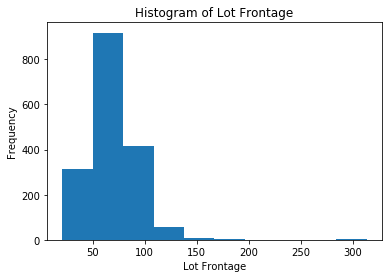

In [10]:
plt.hist(train['Lot Frontage'])
plt.title('Histogram of Lot Frontage')
plt.xlabel('Lot Frontage')
plt.ylabel('Frequency');

330 null value in Lot Frontage is due to units with no Frontage. The distribution of Lot Frontage in the train data is not normally distributed, thus the null value is replaced by the median value of Lot Frontage.

Box Plot of Lot Frontage Before Fill Na showing distribution of data before fillna.

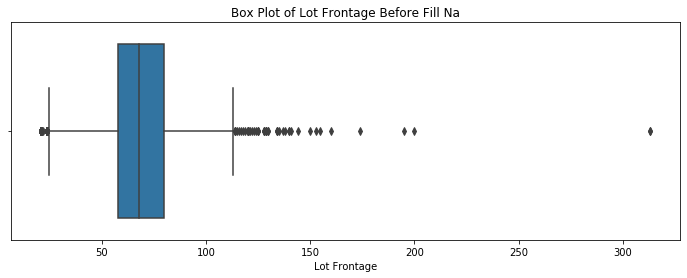

In [11]:
fix, ax = plt.subplots(figsize=(12,4))
ax= sns.boxplot(y='Lot Frontage',data=train,orient='h').set_title('Box Plot of Lot Frontage Before Fill Na')

In [12]:
train['Lot Frontage']=train['Lot Frontage'].fillna(value=train['Lot Frontage'].median())

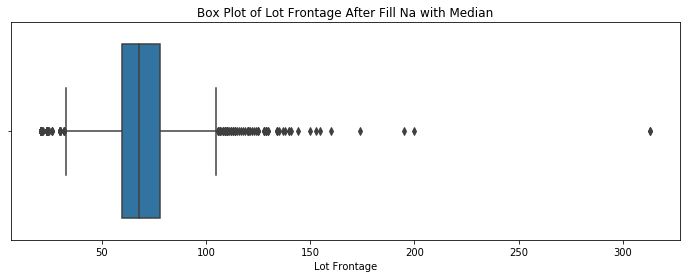

In [13]:
fix, ax = plt.subplots(figsize=(12,4))
ax= sns.boxplot(y='Lot Frontage',data=train,orient='h').set_title('Box Plot of Lot Frontage After Fill Na with Median')

Box Plot of Lot Frontage After Fill Na showing distribution of data after fillna.No major impact after fillna with Lot Frontage median.

1911 null value in Alley is due to units with no Alley acess. Alley column comprises categorial variable, thus the null values will be updated with value'0'.

In [14]:
train['Alley']=train['Alley'].fillna(value=0)

checking after train['Alley'] fillna with 0

In [15]:
train[train['Alley'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


The 22 null value in Mas Vnr Type & Mas Vnr Area are due to missing value. Null value for Mas Vnr Type is filled with the mode item 'None' while null value for Mas Vnr Area is filled with value '0' (corressponding value for None Mas Vnr Area).

In [16]:
# plt.hist(train['Mas Vnr Type'])
# plt.title('Histogram of Mas Vnr Type')
# plt.xlabel('Mas Vnr Type')
# plt.ylabel('Frequency');

Histogram of Mas Vnr Type shows there are high frequency in 'BrkFace' & None.

In [17]:
train['Mas Vnr Type']= train['Mas Vnr Type'].fillna(train['Mas Vnr Type'].mode()[0])

In [18]:
train[train['Mas Vnr Type'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


In [19]:
# plt.hist(train['Mas Vnr Area'])
# plt.title('Histogram of Mas Vnr Area')
# plt.xlabel('Mas Vnr Area')
# plt.ylabel('Frequency');

Histogram of Mas Vnr Area shows there are high frequency in '0'.

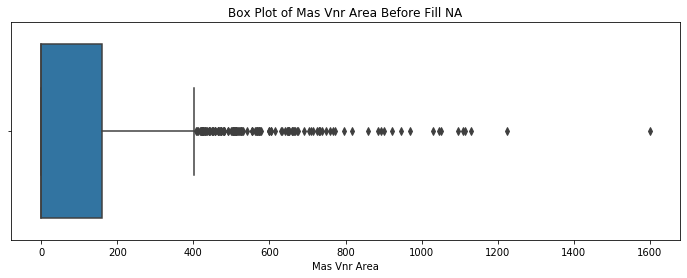

In [20]:
fix, ax = plt.subplots(figsize=(12,4))
ax= sns.boxplot(y='Mas Vnr Area',data=train,orient='h').set_title('Box Plot of Mas Vnr Area Before Fill NA')

Box Plot of Mas Vnr Area Before Fill Na showing distribution of data before fillna.

In [21]:
train['Mas Vnr Area']=train['Mas Vnr Area'].fillna(value=0)

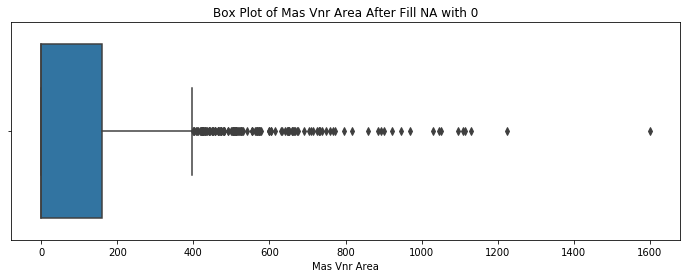

In [22]:
fix, ax = plt.subplots(figsize=(12,4))
ax= sns.boxplot(y='Mas Vnr Area',data=train,orient='h').set_title('Box Plot of Mas Vnr Area After Fill NA with 0')

Box Plot of Mas Vnr Area After Fill Na showing distribution of data after fillna.No major impact after fillna with value 0.

The 55 null value in Bsmt Qual,Bsmt Cond, BsmtFin Type 1,Bsmt Exposure,BsmtFin Type 2 are due to housing with no basement. Null value for Bsmt Qual,Bsmt Cond & BsmtFin Type 1,Bsmt Exposure,BsmtFin Type 2 are filled with '0'.

In [23]:
check_basement=train[(train['Bsmt Qual'].isnull())&(train['Bsmt Cond'].isnull())&(train['BsmtFin Type 1'].isnull())&(train['Bsmt Exposure'].isnull())&(train['BsmtFin Type 2'].isnull())]
check_basement[['Id','Bsmt Qual','Bsmt Cond','BsmtFin Type 1','Bsmt Exposure','BsmtFin Type 2']]

,Id,Bsmt Qual,Bsmt Cond,BsmtFin Type 1,Bsmt Exposure,BsmtFin Type 2
12,807,NaN,NaN,NaN,NaN,NaN
93,811,NaN,NaN,NaN,NaN,NaN
114,781,NaN,NaN,NaN,NaN,NaN
146,888,NaN,NaN,NaN,NaN,NaN
183,1554,NaN,NaN,NaN,NaN,NaN
240,2740,NaN,NaN,NaN,NaN,NaN
249,2242,NaN,NaN,NaN,NaN,NaN
256,2745,NaN,NaN,NaN,NaN,NaN
390,84,NaN,NaN,NaN,NaN,NaN
437,1501,NaN,NaN,NaN,NaN,NaN


In [24]:
train.update(train[['Bsmt Qual','Bsmt Cond','BsmtFin Type 1','Bsmt Exposure','BsmtFin Type 2']].fillna(value=0))

check on last 2 ID returned in queries above to ensure changes has been correctly made.

In [25]:
 train[(train['Id']==2338)|(train['Id']==2880)]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1933,2338,527226010,60,RL,68.0,14762,Pave,0,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Feedr,Norm,1Fam,2Story,5,6,1948,1950,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,0,0,0,0,0.0,0,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,1547,720,53,2320,0.0,0.0,2,0,2,1,TA,7,Typ,1,TA,Attchd,1979.0,Unf,2.0,672.0,TA,TA,P,120,144,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,169000
2010,2880,911175410,30,C (all),69.0,12366,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,1Story,3,5,1945,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,0,0,0,0,0.0,0,0.0,0.0,0.0,GasA,TA,N,SBrkr,729,0,0,729,0.0,0.0,1,0,2,1,TA,5,Mod,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,23,0,0,0,NaN,NaN,NaN,0,10,2006,WD,51689


In [26]:
check_basement_2=train[(train['BsmtFin SF 1'].isnull())&(train['BsmtFin SF 2'].isnull())&(train['Bsmt Unf SF'].isnull())&(train['Total Bsmt SF'].isnull())]
check_basement_2[['Id','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF']]

,Id,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
1327,1342,NaN,NaN,NaN,NaN


The 4 null value in BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF are due to housing with no basement. Null value for BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF are filled with '0'.

In [27]:
train.update(train[['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF']].fillna(value=0))

check on last ID returned in queries above to ensure changes has been correctly made.

In [28]:
train[train['Id']==1342]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,0,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,0,0,0,0,0.0,0,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


The 2 null value in Bsmt Full Bath & Bsmt Half Bath are due to housing with no basement. Null value for Bsmt Full Bath & Bsmt Half Bath are filled with '0.0'.

In [29]:
check_basement_3=train[(train['Bsmt Full Bath'].isnull())&(train['Bsmt Half Bath'].isnull())]
check_basement_3[['Id','Bsmt Full Bath','Bsmt Half Bath']]

,Id,Bsmt Full Bath,Bsmt Half Bath
616,1498,NaN,NaN
1327,1342,NaN,NaN


In [30]:
train.update(train[['Bsmt Full Bath','Bsmt Half Bath']].fillna(value=0))

check on last 2 ID returned in queries above to ensure changes has been correctly made.

In [31]:
train[(train['Id']==1498)|(train['Id']==1342)]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
616,1498,908154080,20,RL,123.0,47007,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,0,0,0,0,0.0,0,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,0.0,0.0,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,0,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,0,0,0,0,0.0,0,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,0.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


Data cleaning for other 4 Garage columns (Garage Finish,Garage Qual,Garage Cond & Garage Yr Blt ) involved 114 rows. However, there are only 113 null value for Garage Type and one null value each for Garage Cars and Garage Area respectively. This is due to one of the properties only have informaation filled for Garage Type. 

In [32]:
train[(train['Garage Finish'].isnull())&(train['Garage Qual'].isnull())&(train['Garage Cond'].isnull())&(train['Garage Yr Blt'].isnull())&(train['Garage Type'].notnull())]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In this case properties with Id 2237 will have it's null value in Garage Cars and Garage Area be updated with Garbage Type: Detchd 'median.<br>
Garage Cars median by Garbage Type: Detchd =2
Garage Area median by Garbage Type: Detchd =400

Drop Id 2237 which has 4 columns of missing values for garbage and have only information on garbage type. <br>
Time consumed use to check for median/ mean for 4 columns for 1 entry doesnt justify. It is more efficient to just drop this observation.

In [33]:
train.drop(train[train.Id==2237].index,inplace=True)

In [34]:
train[train['Id']==2237]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


The 113 rows of null value in Garage Finish,Garage Qual,Garage Cond columns are due to housing with no garage.Null value for Garage Finish,Garage Qual,Garage Cond are filled with '0'.<br>


In [35]:
check_garage=train[(train['Garage Finish'].isnull())&(train['Garage Qual'].isnull())&(train['Garage Cond'].isnull())&(train['Garage Type'].isnull())]
check_garage[['Id','Garage Finish','Garage Qual','Garage Cond','Garage Type']]

,Id,Garage Finish,Garage Qual,Garage Cond,Garage Type
28,2243,NaN,NaN,NaN,NaN
53,330,NaN,NaN,NaN,NaN
65,2278,NaN,NaN,NaN,NaN
79,2235,NaN,NaN,NaN,NaN
101,2084,NaN,NaN,NaN,NaN
103,728,NaN,NaN,NaN,NaN
114,781,NaN,NaN,NaN,NaN
120,1492,NaN,NaN,NaN,NaN
134,1514,NaN,NaN,NaN,NaN
136,216,NaN,NaN,NaN,NaN


In [36]:
train.update(train[['Garage Finish','Garage Qual','Garage Cond','Garage Type']].fillna(value=0))

check on last 2 ID returned in queries above to ensure changes has been correctly made.

In [37]:
train[(train['Id']==2288)|(train['Id']==2842)]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
2039,2288,923228220,160,RM,21.0,1495,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,BrkFace,189.0,TA,TA,CBlock,TA,TA,No,ALQ,384.0,Unf,0.0,162.0,546.0,GasA,Ex,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,0,NaN,0,0.0,0.0,0,0,Y,0,64,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,93900
2042,2842,909101080,50,RL,45.0,8248,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,4,4,1922,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,864.0,864.0,GasA,TA,N,SBrkr,964,0,450,1414,0.0,0.0,1,0,3,1,TA,8,Typ,1,Gd,0,NaN,0,0.0,0.0,0,0,N,0,0,112,0,0,0,NaN,NaN,NaN,0,9,2006,COD,83000


The  null value in Garage Yr Blt is due to housing with no garage.Null value for Garage Yr Blt is filled with '0.0'.

In [38]:
check_garage_2=train[(train['Garage Yr Blt'].isnull())]
check_garage_2[['Id','Garage Yr Blt']]

,Id,Garage Yr Blt
28,2243,NaN
53,330,NaN
65,2278,NaN
79,2235,NaN
101,2084,NaN
103,728,NaN
114,781,NaN
120,1492,NaN
134,1514,NaN
136,216,NaN


In [39]:
train.update(train[['Garage Yr Blt']].fillna(value=0))

check on last 2 ID returned in queries above to ensure changes has been correctly made.

In [40]:
train[(train['Id']==2288)|(train['Id']==2842)]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
2039,2288,923228220,160,RM,21.0,1495,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,BrkFace,189.0,TA,TA,CBlock,TA,TA,No,ALQ,384.0,Unf,0.0,162.0,546.0,GasA,Ex,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,0,0.0,0,0.0,0.0,0,0,Y,0,64,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,93900
2042,2842,909101080,50,RL,45.0,8248,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,4,4,1922,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,864.0,864.0,GasA,TA,N,SBrkr,964,0,450,1414,0.0,0.0,1,0,3,1,TA,8,Typ,1,Gd,0,0.0,0,0.0,0.0,0,0,N,0,0,112,0,0,0,NaN,NaN,NaN,0,9,2006,COD,83000


Fireplace quality,Pool quality,Fence & Misc Feature are categorial variable, and not all the properties is having this features, thus the missing value will be filled with NA.

In [41]:
col=['Fireplace Qu','Pool QC','Fence','Misc Feature']
[train[col].fillna(value=0,inplace=True)for col in train.columns]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [42]:
train.head(10)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,68.0,13517,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,0,0,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,NAmes,PosA,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,247.0,Rec,713.0,557.0,1517.0,GasA,Ex,Y,SBrkr,1888,0,0,1888,0.0,0.0,2,1,2,1,Gd,6,Mod,1,Gd,Attchd,1966.0,Fin,2.0,578.0,TA,TA,Y,0,0,0,0,0,0,0,0,0,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SFoyer,6,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,82.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547.0,Unf,0.0,0.0,547.0,GasA,Gd,Y,SBrkr,1072,0,0,1072,1.0,0.0,2,0,2,1,TA,5,Typ,0,0,Basment,2005.0,Fin,2.0,525.0,TA,TA,Y,0,44,0,0,0,0,0,0,0,0,6,2006,New,140000
7,145,535154050,20,RL,68.0,12160,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000.0,Unf,0.0,188.0,1188.0,GasA,Fa,Y,SBrkr,1188,0,0,1188,1.0,0.0,1,0,3,1,TA,6,Typ,0,0,Attchd,1959.0,RFn,2.0,531.0,TA,TA,Y,0,0,0,0,0,0,0,MnPrv,0,0,5,2010,COD,142000
8,1942,535353130,20,RL,68.0,15783,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,292.0,Unf,0.0,632.0,924.0,GasA,TA,Y,SBrkr,924,0,0,924,0.0,0.0,1,0,2,1,TA,6,Typ,0,0,Detchd,1952.0,Unf,1.0,420.0,TA,TA,Y,0,324,0,0,0,0,0,MnPrv,Shed,400,6,2007,WD,112500
9,1956,535426130,60,RL,70.0

last check if there anymore null value in the train data table

In [43]:
null_columns=train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

Series([], dtype: float64)

In [44]:
train.shape

(2050, 81)

1 row has been dropped earlier

In [45]:
train.insert(loc=0,column='train',value=1)

In [46]:
train.head(3)

,train,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,1,109,533352170,60,RL,68.0,13517,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,0,0,0,3,2010,WD,130500
1,1,544,531379050,60,RL,43.0,11492,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,0,0,0,4,2009,WD,220000
2,1,153,535304180,20,RL,68.0,7922,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,0,0,0,1,2010,WD,109000


In [47]:
train.shape

(2050, 82)

export clean file to csv

In [48]:
# train.to_csv('train_clean.csv',index=False)

# Import and Read Cleaned Train and Test Dataset

In [49]:
train_clean_csv='./datasets/train_clean.csv'
train_clean=pd.read_csv(train_clean_csv)

In [50]:
train_clean.head()

,train,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,1,109,533352170,60,RL,68.0,13517,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,0,0,0,3,2010,WD,130500
1,1,544,531379050,60,RL,43.0,11492,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,0,0,0,4,2009,WD,220000
2,1,153,535304180,20,RL,68.0,7922,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,0,0,0,1,2010,WD,109000
3,1,318,916386060,60,RL,73.0,9802,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,0,0,0,4,2010,WD,174000
4,1,255,906425045,50,RL,82.0,14235,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,0,0,0,3,2010,WD,138500


In [51]:
train_clean.shape

(2050, 82)

In [52]:
test_clean_csv='./datasets/test_clean.csv'
test_clean=pd.read_csv(test_clean_csv)

In [53]:
test_clean.head()

,train,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,0,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,0,0,0,0,4,2006,WD
1,0,2718,905108090,90,RL,68.0,9662,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,0,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,0,0,0,0,8,2006,WD
2,0,2414,528218130,60,RL,58.0,17104,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,0,0,0,0,9,2006,New
3,0,1989,902207150,30,RM,60.0,8520,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,0,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,0,0,0,0,7,2007,WD
4,0,625,535105100,20,RL,68.0,9500,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,0,0,0,0,7,2009,WD


In [54]:
test_clean.shape

(878, 81)

In [55]:
frames=[train_clean,test_clean]
train_test=pd.concat(frames)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [56]:
train_test.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Enclosed Porch,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fence,Fireplace Qu,Fireplaces,Foundation,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Qual,Garage Type,Garage Yr Blt,Gr Liv Area,Half Bath,Heating,Heating QC,House Style,Id,Kitchen AbvGr,Kitchen Qual,Land Contour,Land Slope,Lot Area,Lot Config,Lot Frontage,Lot Shape,Low Qual Fin SF,MS SubClass,MS Zoning,Mas Vnr Area,Mas Vnr Type,Misc Feature,Misc Val,Mo Sold,Neighborhood,Open Porch SF,Overall Cond,Overall Qual,PID,Paved Drive,Pool Area,Pool QC,Roof Matl,Roof Style,Sale Type,SalePrice,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,train
0,725,754,0,0,3,1Fam,TA,No,0.0,0.0,TA,192.0,533.0,0.0,GLQ,Unf,Y,RRAe,Norm,SBrkr,0,TA,Gd,HdBoard,Plywood,0,0,0,CBlock,2,Typ,475.0,2.0,TA,RFn,TA,Attchd,1976.0,1479,1,GasA,Ex,2Story,109,1,Gd,Lvl,Gtl,13517,CulDSac,68.0,IR1,0,60,RL,289.0,BrkFace,0,0,3,Sawyer,44,8,6,533352170,Y,0,0,CompShg,Gable,WD,130500.0,0,Pave,6,725.0,AllPub,0,1976,2005,2010,1
1,913,1209,0,0,4,1Fam,TA,No,1.0,0.0,Gd,276.0,637.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,0,TA,1,PConc,2,Typ,559.0,2.0,TA,RFn,TA,Attchd,1997.0,2122,1,GasA,Ex,2Story,544,1,Gd,Lvl,Gtl,11492,CulDSac,43.0,IR1,0,60,RL,132.0,BrkFace,0,0,4,SawyerW,74,5,7,531379050,Y,0,0,CompShg,Gable,WD,220000.0,0,Pave,8,913.0,AllPub,0,1996,1997,2009,1
2,1057,0,0,0,3,1Fam,TA,No,1.0,0.0,TA,326.0,731.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,Gd,TA,VinylSd,VinylSd,0,0,0,CBlock,1,Typ,246.0,1.0,TA,Unf,TA,Detchd,1953.0,1057,0,GasA,TA,1Story,153,1,Gd,Lvl,Gtl,7922,Inside,68.0,Reg,0,20,RL,0.0,None,0,0,1,NAmes,52,7,5,535304180,Y,0,0,CompShg,Gable,WD,109000.0,0,Pave,5,1057.0,AllPub,0,1953,2007,2010,1
3,744,700,0,0,3,1Fam,TA,No,0.0,0.0,Gd,384.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,0,0,0,PConc,2,Typ,400.0,2.0,TA,Fin,TA,BuiltIn,2007.0,1444,1,GasA,Gd,2Story,318,1,TA,Lvl,Gtl,9802,Inside,73.0,Reg,0,60,RL,0.0,None,0,0,4,Timber,0,5,5,916386060,Y,0,0,CompShg,Gable,WD,174000.0,0,Pave,7,384.0,AllPub,100,2006,2007,2010,1
4,831,614,0,0,3,1Fam,Gd,No,0.0,0.0,Fa,676.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Plywood,0,0,0,PConc,2,Typ,484.0,2.0,TA,Unf,TA,Detchd,1957.0,1445,0,GasA,TA,1.5Fin,255,1,TA,Lvl,Gtl,14235,Inside,82.0,IR1,0,50,RL,0.0,None,0,0,3,SawyerW,59,8,6,906425045,N,0,0,CompShg,Gable,WD,138500.0,0,Pave,6,676.0,AllPub,0,1900,1993,2010,1


In [57]:
train_test.shape

(2928, 82)

In [58]:
null_columns=train_test.columns[train_test.isnull().any()]
train_test[null_columns].isnull().sum()

SalePrice    878
dtype: int64

# Create and Add New Columns for Train and Test Dataset

Create New Column which calculate Property Age.

In [59]:
current_year=2019
train_test['Property Age']=current_year-train_test['Year Built']

Create New Column which calculate Property Remodel Age.

In [60]:
train_test['Remodel Age']=current_year-train_test['Year Remod/Add']

Create New Column which indicate if the property has undergone Remodel/Add.

In [61]:
train_test['Remod/Add']=np.where(train_test['Remodel Age']<train_test['Property Age'],1,0)

In [62]:
train_test[train_test['Remod/Add']==0].head(2)

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Enclosed Porch,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fence,Fireplace Qu,Fireplaces,Foundation,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Qual,Garage Type,Garage Yr Blt,Gr Liv Area,Half Bath,Heating,Heating QC,House Style,Id,Kitchen AbvGr,Kitchen Qual,Land Contour,Land Slope,Lot Area,Lot Config,Lot Frontage,Lot Shape,Low Qual Fin SF,MS SubClass,MS Zoning,Mas Vnr Area,Mas Vnr Type,Misc Feature,Misc Val,Mo Sold,Neighborhood,Open Porch SF,Overall Cond,Overall Qual,PID,Paved Drive,Pool Area,Pool QC,Roof Matl,Roof Style,Sale Type,SalePrice,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,train,Property Age,Remodel Age,Remod/Add
7,1188,0,0,0,3,1Fam,TA,No,1.0,0.0,TA,188.0,1000.0,0.0,Rec,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,MnPrv,0,0,CBlock,1,Typ,531.0,2.0,TA,RFn,TA,Attchd,1959.0,1188,0,GasA,Fa,1Story,145,1,TA,Lvl,Gtl,12160,Inside,68.0,IR1,0,20,RL,180.0,BrkFace,0,0,5,NAmes,0,5,5,535154050,Y,0,0,CompShg,Hip,COD,142000.0,0,Pave,6,1188.0,AllPub,0,1959,1959,2010,1,60,60,0
8,924,0,0,0,2,1Fam,TA,No,0.0,0.0,TA,632.0,292.0,0.0,Rec,Unf,Y,Artery,Norm,SBrkr,0,TA,TA,Wd Sdng,Wd Sdng,MnPrv,0,0,CBlock,1,Typ,420.0,1.0,TA,Unf,TA,Detchd,1952.0,924,0,GasA,TA,1Story,1942,1,TA,Lvl,Gtl,15783,Inside,68.0,Reg,0,20,RL,0.0,None,Shed,400,6,OldTown,324,5,5,535353130,Y,0,0,CompShg,Gable,WD,112500.0,0,Pave,6,924.0,AllPub,0,1952,1952,2007,1,67,67,0


# Binary Category Ordinary Category Mapping and One-hot Encode Categorial Variables

Map Binary Category Variable for 'Central Air'

In [63]:
train_test['Central Air']=train_test['Central Air'].map({'Y':1,'N':0})
print(train_test['Central Air'].dtypes)

int64


Map Ordinal Category Variable into Numeric

Check unique value and their counts for respective column. the counts is useful when debugging.

In [64]:
train_test['Pool QC'].value_counts()

0     2915
Gd       4
Ex       4
TA       3
Fa       2
Name: Pool QC, dtype: int64

In [65]:
train_test['Exter Qual']=train_test['Exter Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0})

In [66]:
train_test['Exter Cond']=train_test['Exter Cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0})

In [67]:
train_test['Bsmt Qual']=train_test['Bsmt Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0})

In [68]:
train_test['Bsmt Cond']=train_test['Bsmt Cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0})

In [69]:
train_test['Bsmt Exposure']=train_test['Bsmt Exposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'0':0})

In [70]:
train_test['BsmtFin Type 1']=train_test['BsmtFin Type 1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'0':0})

In [71]:
train_test['BsmtFin Type 2']=train_test['BsmtFin Type 2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'0':0})

In [72]:
train_test['Heating QC']=train_test['Heating QC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0})

In [73]:
train_test['Kitchen Qual']=train_test['Kitchen Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0})

In [74]:
train_test['Fireplace Qu']=train_test['Fireplace Qu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0})

In [75]:
train_test['Garage Qual']=train_test['Garage Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0})

In [76]:
train_test['Garage Cond']=train_test['Garage Cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0})

In [77]:
train_test['Pool QC']=train_test['Pool QC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'0':0})

Check for any null value after mapping to ensure mapping is successfully done.

In [78]:
null_columns=train_test.columns[train_test.isnull().any()]
train_test[null_columns].isnull().sum()

SalePrice    878
dtype: int64

One-hot encode categorical variables

In [79]:
train_test=pd.get_dummies(train_test,columns=['Lot Config','MS Zoning','Street','Alley','Lot Shape','Land Contour','Utilities','Land Slope','Neighborhood','Condition 1','Condition 2','Bldg Type','House Style','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation','Heating','Electrical','Functional','Garage Type','Garage Finish','Paved Drive','Fence','Misc Feature','Sale Type'],prefix=['lot_config','zon','rd_access','al_access','prop_shape','prop_flatness','utility','prop_slope','neigh','proxi_1','promxi_2','bldg_type','hse_style','r_style','r_mat','ex_1','ex_2','mas_type','found_','heat_','ele_','funct','garage_ty','garage_fin','paved_dr','fence','misc','sale_type'],drop_first=True)

In [80]:
train_test.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Enclosed Porch,Exter Cond,Exter Qual,Fireplace Qu,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Cond,Garage Qual,Garage Yr Blt,Gr Liv Area,Half Bath,Heating QC,Id,Kitchen AbvGr,Kitchen Qual,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Overall Cond,Overall Qual,PID,Pool Area,Pool QC,SalePrice,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,train,Property Age,Remodel Age,Remod/Add,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,zon_C (all),zon_FV,zon_I (all),zon_RH,zon_RL,zon_RM,rd_access_Pave,al_access_Grvl,al_access_Pave,prop_shape_IR2,prop_shape_IR3,prop_shape_Reg,prop_flatness_HLS,prop_flatness_Low,prop_flatness_Lvl,utility_NoSeWa,utility_NoSewr,prop_slope_Mod,prop_slope_Sev,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,proxi_1_Feedr,proxi_1_Norm,proxi_1_PosA,proxi_1_PosN,proxi_1_RRAe,proxi_1_RRAn,proxi_1_RRNe,proxi_1_RRNn,promxi_2_Feedr,promxi_2_Norm,promxi_2_PosA,promxi_2_PosN,promxi_2_RRAe,promxi_2_RRAn,promxi_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,hse_style_1.5Unf,hse_style_1Story,hse_style_2.5Fin,hse_style_2.5Unf,hse_style_2Story,hse_style_SFoyer,hse_style_SLvl,r_style_Gable,r_style_Gambrel,r_style_Hip,r_style_Mansard,r_style_Shed,r_mat_CompShg,r_mat_Membran,r_mat_Metal,r_mat_Roll,r_mat_Tar&Grv,r_mat_WdShake,r_mat_WdShngl,ex_1_AsphShn,ex_1_BrkComm,ex_1_BrkFace,ex_1_CBlock,ex_1_CemntBd,ex_1_HdBoard,ex_1_ImStucc,ex_1_MetalSd,ex_1_Plywood,ex_1_PreCast,ex_1_Stone,ex_1_Stucco,ex_1_VinylSd,ex_1_Wd Sdng,ex_1_WdShing,ex_2_AsphShn,ex_2_Brk Cmn,ex_2_BrkFace,ex_2_CBlock,ex_2_CmentBd,ex_2_HdBoard,ex_2_ImStucc,ex_2_MetalSd,ex_2_Other,ex_2_Plywood,ex_2_PreCast,ex_2_Stone,ex_2_Stucco,ex_2_VinylSd,ex_2_Wd Sdng,ex_2_Wd Shng,mas_type_BrkFace,mas_type_CBlock,mas_type_None,mas_type_Stone,found__CBlock,found__PConc,found__Slab,found__Stone,found__Wood,heat__GasA,heat__GasW,heat__Grav,heat__OthW,heat__Wall,ele__FuseF,ele__FuseP,ele__Mix,ele__SBrkr,funct_Maj2,funct_Min1,funct_Min2,funct_Mod,funct_Sal,funct_Sev,funct_Typ,garage_ty_2Types,garage_ty_Attchd,garage_ty_Basment,garage_ty_BuiltIn,garage_ty_CarPort,garage_ty_Detchd,garage_fin_Fin,garage_fin_RFn,garage_fin_Unf,paved_dr_P,paved_dr_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,misc_Elev,misc_Gar2,misc_Othr,misc_Shed,misc_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,725,754,0,3,3,1,0.0,0.0,3,192.0,533.0,0.0,6,1,1,0,3,4,0,0,2,475.0,2.0,3,3,1976.0,1479,1,5,109,1,4,13517,68.0,0,60,289.0,0,3,44,8,6,533352170,0,0,130500.0,0,6,725.0,0,1976,2005,2010,1,43,14,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,913,1209,0,4,3,1,1.0,0.0,4,276.0,637.0,0.0,6,1,1,0,3,4,3,1,2,559.0,2.0,3,3,1997.0,2122,1,5,544,1,4,11492,43.0,0,60,132.0,0,4,74,5,7,531379050,0,0,220000.0,0,8,913.0,0,1996,1997,2009,1,23,22,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0

Check shape

In [81]:
train_test.shape

(2928, 230)

Check if there's any null value after dummies variable is created

In [82]:
null_columns=train_test.columns[train_test.isnull().any()]
train_test[null_columns].isnull().sum()

SalePrice    878
dtype: int64

rearrange columns

In [83]:
train_test[train_test['train']==1].head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Enclosed Porch,Exter Cond,Exter Qual,Fireplace Qu,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Cond,Garage Qual,Garage Yr Blt,Gr Liv Area,Half Bath,Heating QC,Id,Kitchen AbvGr,Kitchen Qual,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Overall Cond,Overall Qual,PID,Pool Area,Pool QC,SalePrice,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,train,Property Age,Remodel Age,Remod/Add,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,zon_C (all),zon_FV,zon_I (all),zon_RH,zon_RL,zon_RM,rd_access_Pave,al_access_Grvl,al_access_Pave,prop_shape_IR2,prop_shape_IR3,prop_shape_Reg,prop_flatness_HLS,prop_flatness_Low,prop_flatness_Lvl,utility_NoSeWa,utility_NoSewr,prop_slope_Mod,prop_slope_Sev,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,proxi_1_Feedr,proxi_1_Norm,proxi_1_PosA,proxi_1_PosN,proxi_1_RRAe,proxi_1_RRAn,proxi_1_RRNe,proxi_1_RRNn,promxi_2_Feedr,promxi_2_Norm,promxi_2_PosA,promxi_2_PosN,promxi_2_RRAe,promxi_2_RRAn,promxi_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,hse_style_1.5Unf,hse_style_1Story,hse_style_2.5Fin,hse_style_2.5Unf,hse_style_2Story,hse_style_SFoyer,hse_style_SLvl,r_style_Gable,r_style_Gambrel,r_style_Hip,r_style_Mansard,r_style_Shed,r_mat_CompShg,r_mat_Membran,r_mat_Metal,r_mat_Roll,r_mat_Tar&Grv,r_mat_WdShake,r_mat_WdShngl,ex_1_AsphShn,ex_1_BrkComm,ex_1_BrkFace,ex_1_CBlock,ex_1_CemntBd,ex_1_HdBoard,ex_1_ImStucc,ex_1_MetalSd,ex_1_Plywood,ex_1_PreCast,ex_1_Stone,ex_1_Stucco,ex_1_VinylSd,ex_1_Wd Sdng,ex_1_WdShing,ex_2_AsphShn,ex_2_Brk Cmn,ex_2_BrkFace,ex_2_CBlock,ex_2_CmentBd,ex_2_HdBoard,ex_2_ImStucc,ex_2_MetalSd,ex_2_Other,ex_2_Plywood,ex_2_PreCast,ex_2_Stone,ex_2_Stucco,ex_2_VinylSd,ex_2_Wd Sdng,ex_2_Wd Shng,mas_type_BrkFace,mas_type_CBlock,mas_type_None,mas_type_Stone,found__CBlock,found__PConc,found__Slab,found__Stone,found__Wood,heat__GasA,heat__GasW,heat__Grav,heat__OthW,heat__Wall,ele__FuseF,ele__FuseP,ele__Mix,ele__SBrkr,funct_Maj2,funct_Min1,funct_Min2,funct_Mod,funct_Sal,funct_Sev,funct_Typ,garage_ty_2Types,garage_ty_Attchd,garage_ty_Basment,garage_ty_BuiltIn,garage_ty_CarPort,garage_ty_Detchd,garage_fin_Fin,garage_fin_RFn,garage_fin_Unf,paved_dr_P,paved_dr_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,misc_Elev,misc_Gar2,misc_Othr,misc_Shed,misc_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,725,754,0,3,3,1,0.0,0.0,3,192.0,533.0,0.0,6,1,1,0,3,4,0,0,2,475.0,2.0,3,3,1976.0,1479,1,5,109,1,4,13517,68.0,0,60,289.0,0,3,44,8,6,533352170,0,0,130500.0,0,6,725.0,0,1976,2005,2010,1,43,14,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,913,1209,0,4,3,1,1.0,0.0,4,276.0,637.0,0.0,6,1,1,0,3,4,3,1,2,559.0,2.0,3,3,1997.0,2122,1,5,544,1,4,11492,43.0,0,60,132.0,0,4,74,5,7,531379050,0,0,220000.0,0,8,913.0,0,1996,1997,2009,1,23,22,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0

Rearrange Columns

In [84]:
cols = list(train_test.columns.values)

In [85]:
train_test = train_test[['train',
 'Id',
 'PID',
 '1st Flr SF',
 '2nd Flr SF',
 '3Ssn Porch',
 'Bedroom AbvGr',
 'Bsmt Cond',
 'Bsmt Exposure',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Bsmt Qual',
 'Bsmt Unf SF',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Central Air',
 'Enclosed Porch',
 'Exter Cond',
 'Exter Qual',
 'Fireplace Qu',
 'Fireplaces',
 'Full Bath',
 'Garage Area',
 'Garage Cars',
 'Garage Cond',
 'Garage Qual',
 'Garage Yr Blt',
 'Gr Liv Area',
 'Half Bath',
 'Heating QC', 
 'Kitchen AbvGr',
 'Kitchen Qual',
 'Lot Area',
 'Lot Frontage',
 'Low Qual Fin SF',
 'MS SubClass',
 'Mas Vnr Area',
 'Misc Val',
 'Mo Sold',
 'Open Porch SF',
 'Overall Cond',
 'Overall Qual',
 'Pool Area',
 'Pool QC',
 'Screen Porch',
 'TotRms AbvGrd',
 'Total Bsmt SF',
 'Wood Deck SF',
 'Year Built',
 'Year Remod/Add',
 'Property Age',
 'Remodel Age',
 'Remod/Add',
 'Yr Sold',                         
 'lot_config_CulDSac',
 'lot_config_FR2',
 'lot_config_FR3',
 'lot_config_Inside',
 'zon_C (all)',
 'zon_FV',
 'zon_I (all)',
 'zon_RH',
 'zon_RL',
 'zon_RM',
 'rd_access_Pave',
 'al_access_Grvl',
 'al_access_Pave',
 'prop_shape_IR2',
 'prop_shape_IR3',
 'prop_shape_Reg',
 'prop_flatness_HLS',
 'prop_flatness_Low',
 'prop_flatness_Lvl',
 'utility_NoSeWa',
 'utility_NoSewr',
 'prop_slope_Mod',
 'prop_slope_Sev',
 'neigh_Blueste',
 'neigh_BrDale',
 'neigh_BrkSide',
 'neigh_ClearCr',
 'neigh_CollgCr',
 'neigh_Crawfor',
 'neigh_Edwards',
 'neigh_Gilbert',
 'neigh_Greens',
 'neigh_GrnHill',
 'neigh_IDOTRR',
 'neigh_Landmrk',
 'neigh_MeadowV',
 'neigh_Mitchel',
 'neigh_NAmes',
 'neigh_NPkVill',
 'neigh_NWAmes',
 'neigh_NoRidge',
 'neigh_NridgHt',
 'neigh_OldTown',
 'neigh_SWISU',
 'neigh_Sawyer',
 'neigh_SawyerW',
 'neigh_Somerst',
 'neigh_StoneBr',
 'neigh_Timber',
 'neigh_Veenker',
 'proxi_1_Feedr',
 'proxi_1_Norm',
 'proxi_1_PosA',
 'proxi_1_PosN',
 'proxi_1_RRAe',
 'proxi_1_RRAn',
 'proxi_1_RRNe',
 'proxi_1_RRNn',
 'promxi_2_Feedr',
 'promxi_2_Norm',
 'promxi_2_PosA',
 'promxi_2_PosN',
 'promxi_2_RRAe',
 'promxi_2_RRAn',
 'promxi_2_RRNn',
 'bldg_type_2fmCon',
 'bldg_type_Duplex',
 'bldg_type_Twnhs',
 'bldg_type_TwnhsE',
 'hse_style_1.5Unf',
 'hse_style_1Story',
 'hse_style_2.5Fin',
 'hse_style_2.5Unf',
 'hse_style_2Story',
 'hse_style_SFoyer',
 'hse_style_SLvl',
 'r_style_Gable',
 'r_style_Gambrel',
 'r_style_Hip',
 'r_style_Mansard',
 'r_style_Shed',
 'r_mat_CompShg',
 'r_mat_Membran',
 'r_mat_Metal',
 'r_mat_Roll',
 'r_mat_Tar&Grv',
 'r_mat_WdShake',
 'r_mat_WdShngl',
 'ex_1_AsphShn',
 'ex_1_BrkComm',
 'ex_1_BrkFace',
 'ex_1_CBlock',
 'ex_1_CemntBd',
 'ex_1_HdBoard',
 'ex_1_ImStucc',
 'ex_1_MetalSd',
 'ex_1_Plywood',
 'ex_1_PreCast',
 'ex_1_Stone',
 'ex_1_Stucco',
 'ex_1_VinylSd',
 'ex_1_Wd Sdng',
 'ex_1_WdShing',
 'ex_2_AsphShn',
 'ex_2_Brk Cmn',
 'ex_2_BrkFace',
 'ex_2_CBlock',
 'ex_2_CmentBd',
 'ex_2_HdBoard',
 'ex_2_ImStucc',
 'ex_2_MetalSd',
 'ex_2_Other',
 'ex_2_Plywood',
 'ex_2_PreCast',
 'ex_2_Stone',
 'ex_2_Stucco',
 'ex_2_VinylSd',
 'ex_2_Wd Sdng',
 'ex_2_Wd Shng',
 'mas_type_BrkFace',
 'mas_type_CBlock',
 'mas_type_None',
 'mas_type_Stone',
 'found__CBlock',
 'found__PConc',
 'found__Slab',
 'found__Stone',
 'found__Wood',
 'heat__GasA',
 'heat__GasW',
 'heat__Grav',
 'heat__OthW',
 'heat__Wall',
 'ele__FuseF',
 'ele__FuseP',
 'ele__Mix',
 'ele__SBrkr',
 'funct_Maj2',
 'funct_Min1',
 'funct_Min2',
 'funct_Mod',
 'funct_Sal',
 'funct_Sev',
 'funct_Typ',
 'garage_ty_2Types',
 'garage_ty_Attchd',
 'garage_ty_Basment',
 'garage_ty_BuiltIn',
 'garage_ty_CarPort',
 'garage_ty_Detchd',
 'garage_fin_Fin',
 'garage_fin_RFn',
 'garage_fin_Unf',
 'paved_dr_P',
 'paved_dr_Y',
 'fence_GdPrv',
 'fence_GdWo',
 'fence_MnPrv',
 'fence_MnWw',
 'misc_Elev',
 'misc_Gar2',
 'misc_Othr',
 'misc_Shed',
 'misc_TenC',
 'sale_type_CWD',
 'sale_type_Con',
 'sale_type_ConLD',
 'sale_type_ConLI',
 'sale_type_ConLw',
 'sale_type_New',
 'sale_type_Oth',
 'sale_type_VWD',
 'sale_type_WD ',
 'SalePrice']]

Split DF train_test back into Train Final Dataset & Test Final Dataset.

In [86]:
train_test.tail()

,train,Id,PID,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Enclosed Porch,Exter Cond,Exter Qual,Fireplace Qu,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Cond,Garage Qual,Garage Yr Blt,Gr Liv Area,Half Bath,Heating QC,Kitchen AbvGr,Kitchen Qual,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Overall Cond,Overall Qual,Pool Area,Pool QC,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Property Age,Remodel Age,Remod/Add,Yr Sold,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,zon_C (all),zon_FV,zon_I (all),zon_RH,zon_RL,zon_RM,rd_access_Pave,al_access_Grvl,al_access_Pave,prop_shape_IR2,prop_shape_IR3,prop_shape_Reg,prop_flatness_HLS,prop_flatness_Low,prop_flatness_Lvl,utility_NoSeWa,utility_NoSewr,prop_slope_Mod,prop_slope_Sev,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,proxi_1_Feedr,proxi_1_Norm,proxi_1_PosA,proxi_1_PosN,proxi_1_RRAe,proxi_1_RRAn,proxi_1_RRNe,proxi_1_RRNn,promxi_2_Feedr,promxi_2_Norm,promxi_2_PosA,promxi_2_PosN,promxi_2_RRAe,promxi_2_RRAn,promxi_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,hse_style_1.5Unf,hse_style_1Story,hse_style_2.5Fin,hse_style_2.5Unf,hse_style_2Story,hse_style_SFoyer,hse_style_SLvl,r_style_Gable,r_style_Gambrel,r_style_Hip,r_style_Mansard,r_style_Shed,r_mat_CompShg,r_mat_Membran,r_mat_Metal,r_mat_Roll,r_mat_Tar&Grv,r_mat_WdShake,r_mat_WdShngl,ex_1_AsphShn,ex_1_BrkComm,ex_1_BrkFace,ex_1_CBlock,ex_1_CemntBd,ex_1_HdBoard,ex_1_ImStucc,ex_1_MetalSd,ex_1_Plywood,ex_1_PreCast,ex_1_Stone,ex_1_Stucco,ex_1_VinylSd,ex_1_Wd Sdng,ex_1_WdShing,ex_2_AsphShn,ex_2_Brk Cmn,ex_2_BrkFace,ex_2_CBlock,ex_2_CmentBd,ex_2_HdBoard,ex_2_ImStucc,ex_2_MetalSd,ex_2_Other,ex_2_Plywood,ex_2_PreCast,ex_2_Stone,ex_2_Stucco,ex_2_VinylSd,ex_2_Wd Sdng,ex_2_Wd Shng,mas_type_BrkFace,mas_type_CBlock,mas_type_None,mas_type_Stone,found__CBlock,found__PConc,found__Slab,found__Stone,found__Wood,heat__GasA,heat__GasW,heat__Grav,heat__OthW,heat__Wall,ele__FuseF,ele__FuseP,ele__Mix,ele__SBrkr,funct_Maj2,funct_Min1,funct_Min2,funct_Mod,funct_Sal,funct_Sev,funct_Typ,garage_ty_2Types,garage_ty_Attchd,garage_ty_Basment,garage_ty_BuiltIn,garage_ty_CarPort,garage_ty_Detchd,garage_fin_Fin,garage_fin_RFn,garage_fin_Unf,paved_dr_P,paved_dr_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,misc_Elev,misc_Gar2,misc_Othr,misc_Shed,misc_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,SalePrice
873,0,1662,527377110,1084,793,0,4,3,1,1.0,0.0,3,0.0,931.0,153.0,5,2,1,0,3,3,3,1,2,488.0,2.0,3,3,1974.0,1877,1,3,1,3,8000,80.0,0,60,0.0,0,11,96,6,6,0,0,0,8,1084.0,0,1974,1974,45,45,0,2007,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN
874,0,1234,535126140,1104,884,0,4,3,1,0.0,0.0,3,529.0,575.0,0.0,4,1,1,0,4,4,4,1,2,480.0,2.0,3,3,1966.0,1988,1,5,1,4,14670,90.0,0,60,410.0,0,8,230,7,6,0,0,0,9,1104.0,0,1966,1999,53,20,1,2008,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1

Extract train data set and save as train_final csv file.

In [87]:
train[train['train']==1].shape

(2050, 82)

In [88]:
train_test[train_test['train']==1].shape

(2050, 230)

In [89]:
train_final=train_test[train_test['train']==1]

In [90]:
train_final.head()

,train,Id,PID,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Enclosed Porch,Exter Cond,Exter Qual,Fireplace Qu,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Cond,Garage Qual,Garage Yr Blt,Gr Liv Area,Half Bath,Heating QC,Kitchen AbvGr,Kitchen Qual,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Overall Cond,Overall Qual,Pool Area,Pool QC,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Property Age,Remodel Age,Remod/Add,Yr Sold,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,zon_C (all),zon_FV,zon_I (all),zon_RH,zon_RL,zon_RM,rd_access_Pave,al_access_Grvl,al_access_Pave,prop_shape_IR2,prop_shape_IR3,prop_shape_Reg,prop_flatness_HLS,prop_flatness_Low,prop_flatness_Lvl,utility_NoSeWa,utility_NoSewr,prop_slope_Mod,prop_slope_Sev,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,proxi_1_Feedr,proxi_1_Norm,proxi_1_PosA,proxi_1_PosN,proxi_1_RRAe,proxi_1_RRAn,proxi_1_RRNe,proxi_1_RRNn,promxi_2_Feedr,promxi_2_Norm,promxi_2_PosA,promxi_2_PosN,promxi_2_RRAe,promxi_2_RRAn,promxi_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,hse_style_1.5Unf,hse_style_1Story,hse_style_2.5Fin,hse_style_2.5Unf,hse_style_2Story,hse_style_SFoyer,hse_style_SLvl,r_style_Gable,r_style_Gambrel,r_style_Hip,r_style_Mansard,r_style_Shed,r_mat_CompShg,r_mat_Membran,r_mat_Metal,r_mat_Roll,r_mat_Tar&Grv,r_mat_WdShake,r_mat_WdShngl,ex_1_AsphShn,ex_1_BrkComm,ex_1_BrkFace,ex_1_CBlock,ex_1_CemntBd,ex_1_HdBoard,ex_1_ImStucc,ex_1_MetalSd,ex_1_Plywood,ex_1_PreCast,ex_1_Stone,ex_1_Stucco,ex_1_VinylSd,ex_1_Wd Sdng,ex_1_WdShing,ex_2_AsphShn,ex_2_Brk Cmn,ex_2_BrkFace,ex_2_CBlock,ex_2_CmentBd,ex_2_HdBoard,ex_2_ImStucc,ex_2_MetalSd,ex_2_Other,ex_2_Plywood,ex_2_PreCast,ex_2_Stone,ex_2_Stucco,ex_2_VinylSd,ex_2_Wd Sdng,ex_2_Wd Shng,mas_type_BrkFace,mas_type_CBlock,mas_type_None,mas_type_Stone,found__CBlock,found__PConc,found__Slab,found__Stone,found__Wood,heat__GasA,heat__GasW,heat__Grav,heat__OthW,heat__Wall,ele__FuseF,ele__FuseP,ele__Mix,ele__SBrkr,funct_Maj2,funct_Min1,funct_Min2,funct_Mod,funct_Sal,funct_Sev,funct_Typ,garage_ty_2Types,garage_ty_Attchd,garage_ty_Basment,garage_ty_BuiltIn,garage_ty_CarPort,garage_ty_Detchd,garage_fin_Fin,garage_fin_RFn,garage_fin_Unf,paved_dr_P,paved_dr_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,misc_Elev,misc_Gar2,misc_Othr,misc_Shed,misc_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,SalePrice
0,1,109,533352170,725,754,0,3,3,1,0.0,0.0,3,192.0,533.0,0.0,6,1,1,0,3,4,0,0,2,475.0,2.0,3,3,1976.0,1479,1,5,1,4,13517,68.0,0,60,289.0,0,3,44,8,6,0,0,0,6,725.0,0,1976,2005,43,14,1,2010,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,130500.0
1,1,544,531379050,913,1209,0,4,3,1,1.0,0.0,4,276.0,637.0,0.0,6,1,1,0,3,4,3,1,2,559.0,2.0,3,3,1997.0,2122,1,5,1,4,11492,43.0,0,60,132.0,0,4,74,5,7,0,0,0,8,913.0,0,1996,1997,23,22,1,2009,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,

In [91]:
train_final.tail()

,train,Id,PID,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Enclosed Porch,Exter Cond,Exter Qual,Fireplace Qu,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Cond,Garage Qual,Garage Yr Blt,Gr Liv Area,Half Bath,Heating QC,Kitchen AbvGr,Kitchen Qual,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Overall Cond,Overall Qual,Pool Area,Pool QC,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Property Age,Remodel Age,Remod/Add,Yr Sold,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,zon_C (all),zon_FV,zon_I (all),zon_RH,zon_RL,zon_RM,rd_access_Pave,al_access_Grvl,al_access_Pave,prop_shape_IR2,prop_shape_IR3,prop_shape_Reg,prop_flatness_HLS,prop_flatness_Low,prop_flatness_Lvl,utility_NoSeWa,utility_NoSewr,prop_slope_Mod,prop_slope_Sev,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,proxi_1_Feedr,proxi_1_Norm,proxi_1_PosA,proxi_1_PosN,proxi_1_RRAe,proxi_1_RRAn,proxi_1_RRNe,proxi_1_RRNn,promxi_2_Feedr,promxi_2_Norm,promxi_2_PosA,promxi_2_PosN,promxi_2_RRAe,promxi_2_RRAn,promxi_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,hse_style_1.5Unf,hse_style_1Story,hse_style_2.5Fin,hse_style_2.5Unf,hse_style_2Story,hse_style_SFoyer,hse_style_SLvl,r_style_Gable,r_style_Gambrel,r_style_Hip,r_style_Mansard,r_style_Shed,r_mat_CompShg,r_mat_Membran,r_mat_Metal,r_mat_Roll,r_mat_Tar&Grv,r_mat_WdShake,r_mat_WdShngl,ex_1_AsphShn,ex_1_BrkComm,ex_1_BrkFace,ex_1_CBlock,ex_1_CemntBd,ex_1_HdBoard,ex_1_ImStucc,ex_1_MetalSd,ex_1_Plywood,ex_1_PreCast,ex_1_Stone,ex_1_Stucco,ex_1_VinylSd,ex_1_Wd Sdng,ex_1_WdShing,ex_2_AsphShn,ex_2_Brk Cmn,ex_2_BrkFace,ex_2_CBlock,ex_2_CmentBd,ex_2_HdBoard,ex_2_ImStucc,ex_2_MetalSd,ex_2_Other,ex_2_Plywood,ex_2_PreCast,ex_2_Stone,ex_2_Stucco,ex_2_VinylSd,ex_2_Wd Sdng,ex_2_Wd Shng,mas_type_BrkFace,mas_type_CBlock,mas_type_None,mas_type_Stone,found__CBlock,found__PConc,found__Slab,found__Stone,found__Wood,heat__GasA,heat__GasW,heat__Grav,heat__OthW,heat__Wall,ele__FuseF,ele__FuseP,ele__Mix,ele__SBrkr,funct_Maj2,funct_Min1,funct_Min2,funct_Mod,funct_Sal,funct_Sev,funct_Typ,garage_ty_2Types,garage_ty_Attchd,garage_ty_Basment,garage_ty_BuiltIn,garage_ty_CarPort,garage_ty_Detchd,garage_fin_Fin,garage_fin_RFn,garage_fin_Unf,paved_dr_P,paved_dr_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,misc_Elev,misc_Gar2,misc_Othr,misc_Shed,misc_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,SalePrice
2045,1,1587,921126030,1728,0,0,3,3,3,1.0,0.0,4,873.0,1011.0,0.0,6,1,1,0,3,4,4,1,2,520.0,2.0,3,3,2007.0,1728,0,5,1,4,11449,79.0,0,20,0.0,0,1,276,5,8,0,0,0,7,1884.0,0,2007,2007,12,12,0,2008,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,298751.0
2046,1,785,905377130,861,0,0,1,3,1,0.0,0.0,3,599.0,262.0,0.0,4,1,1,0,3,3,0,0,1,539.0,2.0,3,3,1961.0,861,0,5,1,3,12342,68.0,0,30,0.0,0,3,0,5,4,0,0,0,4,861.0,158,1940,1950,79,69,1,2009,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,

In [92]:
train_final.shape

(2050, 230)

Delete the 'train' column created earlier

In [93]:
del train_final['train']

In [94]:
train_final.shape

(2050, 229)

In [95]:
train_final.head(2)

,Id,PID,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Enclosed Porch,Exter Cond,Exter Qual,Fireplace Qu,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Cond,Garage Qual,Garage Yr Blt,Gr Liv Area,Half Bath,Heating QC,Kitchen AbvGr,Kitchen Qual,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Overall Cond,Overall Qual,Pool Area,Pool QC,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Property Age,Remodel Age,Remod/Add,Yr Sold,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,zon_C (all),zon_FV,zon_I (all),zon_RH,zon_RL,zon_RM,rd_access_Pave,al_access_Grvl,al_access_Pave,prop_shape_IR2,prop_shape_IR3,prop_shape_Reg,prop_flatness_HLS,prop_flatness_Low,prop_flatness_Lvl,utility_NoSeWa,utility_NoSewr,prop_slope_Mod,prop_slope_Sev,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,proxi_1_Feedr,proxi_1_Norm,proxi_1_PosA,proxi_1_PosN,proxi_1_RRAe,proxi_1_RRAn,proxi_1_RRNe,proxi_1_RRNn,promxi_2_Feedr,promxi_2_Norm,promxi_2_PosA,promxi_2_PosN,promxi_2_RRAe,promxi_2_RRAn,promxi_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,hse_style_1.5Unf,hse_style_1Story,hse_style_2.5Fin,hse_style_2.5Unf,hse_style_2Story,hse_style_SFoyer,hse_style_SLvl,r_style_Gable,r_style_Gambrel,r_style_Hip,r_style_Mansard,r_style_Shed,r_mat_CompShg,r_mat_Membran,r_mat_Metal,r_mat_Roll,r_mat_Tar&Grv,r_mat_WdShake,r_mat_WdShngl,ex_1_AsphShn,ex_1_BrkComm,ex_1_BrkFace,ex_1_CBlock,ex_1_CemntBd,ex_1_HdBoard,ex_1_ImStucc,ex_1_MetalSd,ex_1_Plywood,ex_1_PreCast,ex_1_Stone,ex_1_Stucco,ex_1_VinylSd,ex_1_Wd Sdng,ex_1_WdShing,ex_2_AsphShn,ex_2_Brk Cmn,ex_2_BrkFace,ex_2_CBlock,ex_2_CmentBd,ex_2_HdBoard,ex_2_ImStucc,ex_2_MetalSd,ex_2_Other,ex_2_Plywood,ex_2_PreCast,ex_2_Stone,ex_2_Stucco,ex_2_VinylSd,ex_2_Wd Sdng,ex_2_Wd Shng,mas_type_BrkFace,mas_type_CBlock,mas_type_None,mas_type_Stone,found__CBlock,found__PConc,found__Slab,found__Stone,found__Wood,heat__GasA,heat__GasW,heat__Grav,heat__OthW,heat__Wall,ele__FuseF,ele__FuseP,ele__Mix,ele__SBrkr,funct_Maj2,funct_Min1,funct_Min2,funct_Mod,funct_Sal,funct_Sev,funct_Typ,garage_ty_2Types,garage_ty_Attchd,garage_ty_Basment,garage_ty_BuiltIn,garage_ty_CarPort,garage_ty_Detchd,garage_fin_Fin,garage_fin_RFn,garage_fin_Unf,paved_dr_P,paved_dr_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,misc_Elev,misc_Gar2,misc_Othr,misc_Shed,misc_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,SalePrice
0,109,533352170,725,754,0,3,3,1,0.0,0.0,3,192.0,533.0,0.0,6,1,1,0,3,4,0,0,2,475.0,2.0,3,3,1976.0,1479,1,5,1,4,13517,68.0,0,60,289.0,0,3,44,8,6,0,0,0,6,725.0,0,1976,2005,43,14,1,2010,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,130500.0
1,544,531379050,913,1209,0,4,3,1,1.0,0.0,4,276.0,637.0,0.0,6,1,1,0,3,4,3,1,2,559.0,2.0,3,3,1997.0,2122,1,5,1,4,11492,43.0,0,60,132.0,0,4,74,5,7,0,0,0,8,913.0,0,1996,1997,23,22,1,2009,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

Export train_final to csv file.

In [96]:
# train_final.to_csv('train_final.csv',index=False)

Extract test data set and save as test_final csv file.

In [97]:
test_clean[test_clean['train']==0].shape

(878, 81)

In [98]:
train_test[train_test['train']==0].shape

(878, 230)

In [99]:
test_final=train_test[train_test['train']==0]

In [100]:
test_final.shape

(878, 230)

Delete the 'train' column created earlier

In [101]:
del test_final['train']

In [102]:
test_final.shape

(878, 229)

In [103]:
test_final.head(2)

,Id,PID,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Enclosed Porch,Exter Cond,Exter Qual,Fireplace Qu,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Cond,Garage Qual,Garage Yr Blt,Gr Liv Area,Half Bath,Heating QC,Kitchen AbvGr,Kitchen Qual,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Overall Cond,Overall Qual,Pool Area,Pool QC,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Property Age,Remodel Age,Remod/Add,Yr Sold,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,zon_C (all),zon_FV,zon_I (all),zon_RH,zon_RL,zon_RM,rd_access_Pave,al_access_Grvl,al_access_Pave,prop_shape_IR2,prop_shape_IR3,prop_shape_Reg,prop_flatness_HLS,prop_flatness_Low,prop_flatness_Lvl,utility_NoSeWa,utility_NoSewr,prop_slope_Mod,prop_slope_Sev,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,proxi_1_Feedr,proxi_1_Norm,proxi_1_PosA,proxi_1_PosN,proxi_1_RRAe,proxi_1_RRAn,proxi_1_RRNe,proxi_1_RRNn,promxi_2_Feedr,promxi_2_Norm,promxi_2_PosA,promxi_2_PosN,promxi_2_RRAe,promxi_2_RRAn,promxi_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,hse_style_1.5Unf,hse_style_1Story,hse_style_2.5Fin,hse_style_2.5Unf,hse_style_2Story,hse_style_SFoyer,hse_style_SLvl,r_style_Gable,r_style_Gambrel,r_style_Hip,r_style_Mansard,r_style_Shed,r_mat_CompShg,r_mat_Membran,r_mat_Metal,r_mat_Roll,r_mat_Tar&Grv,r_mat_WdShake,r_mat_WdShngl,ex_1_AsphShn,ex_1_BrkComm,ex_1_BrkFace,ex_1_CBlock,ex_1_CemntBd,ex_1_HdBoard,ex_1_ImStucc,ex_1_MetalSd,ex_1_Plywood,ex_1_PreCast,ex_1_Stone,ex_1_Stucco,ex_1_VinylSd,ex_1_Wd Sdng,ex_1_WdShing,ex_2_AsphShn,ex_2_Brk Cmn,ex_2_BrkFace,ex_2_CBlock,ex_2_CmentBd,ex_2_HdBoard,ex_2_ImStucc,ex_2_MetalSd,ex_2_Other,ex_2_Plywood,ex_2_PreCast,ex_2_Stone,ex_2_Stucco,ex_2_VinylSd,ex_2_Wd Sdng,ex_2_Wd Shng,mas_type_BrkFace,mas_type_CBlock,mas_type_None,mas_type_Stone,found__CBlock,found__PConc,found__Slab,found__Stone,found__Wood,heat__GasA,heat__GasW,heat__Grav,heat__OthW,heat__Wall,ele__FuseF,ele__FuseP,ele__Mix,ele__SBrkr,funct_Maj2,funct_Min1,funct_Min2,funct_Mod,funct_Sal,funct_Sev,funct_Typ,garage_ty_2Types,garage_ty_Attchd,garage_ty_Basment,garage_ty_BuiltIn,garage_ty_CarPort,garage_ty_Detchd,garage_fin_Fin,garage_fin_RFn,garage_fin_Unf,paved_dr_P,paved_dr_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,misc_Elev,misc_Gar2,misc_Othr,misc_Shed,misc_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,SalePrice
0,2658,902301120,908,1020,0,4,3,1,0.0,0.0,2,1020.0,0.0,0.0,1,1,0,112,2,3,0,0,2,440.0,1.0,1,1,1910.0,1928,0,4,2,2,9142,69.0,0,190,0.0,0,4,60,8,6,0,0,0,9,1020.0,0,1910,1950,109,69,1,2006,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN
1,2718,905108090,1967,0,0,6,3,1,0.0,0.0,4,1967.0,0.0,0.0,1,1,1,0,3,3,0,0,2,580.0,2.0,3,3,1977.0,1967,0,3,2,3,9662,68.0,0,90,0.0,0,8,0,4,5,0,0,0,10,1967.0,170,1977,1977,42,42,0,2006,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,

Export test_final to csv file.

In [104]:
# test_final.to_csv('test_final.csv',index=False)

# EDA and Exploratory Visualizations for Train Dataset

EDA using train_clean data

Create histograms of all numerical columns


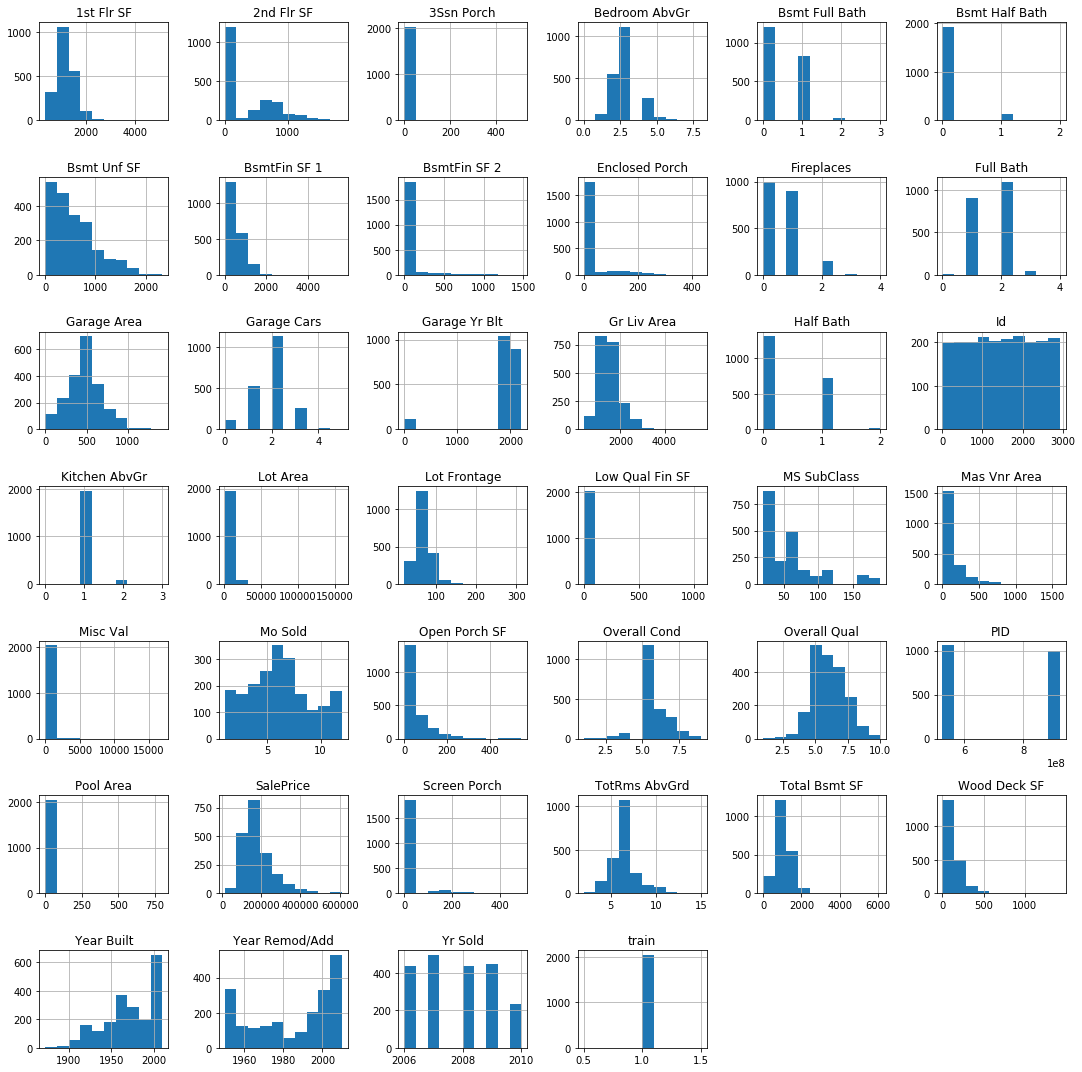

In [105]:
train_clean.hist(figsize=(15,15))
plt.tight_layout();

<font color=blue>Does the student address whether or not they are likely to be able to answer their problem statement with the provided data given what they've discovered during EDA?<br>
Are sufficient visualizations provided?<br>
Do plots accurately demonstrate valid relationships?<br>
Are plots labeled properly?<br>
Are plots interpreted appropriately?<br>
Are plots formatted and scaled appropriately for inclusion in a notebook-based technical report?<br>

Read the data dictionary.
Determine what missing values mean.
Figure out what each categorical value represents.
Identify outliers.
Consider whether discrete values are better represented as categorical or continuous. (Are relationships to the target linear?)

Look at distributions.
Look at correlations.
Look at relationships to target (scatter plots for continuous, box plots for categorical).

1. Homeprice
2. Age of Home
3. Type of Home/dweling
4. Zoning 
5. Home Size
6. Year, Price, Sales type



Check target( SalePrice) distribution

In [106]:
# fix, ax = plt.subplots(figsize=(10,5))
# ax=sns.distplot(train['SalePrice'],kde=True,bins=100)
# xlabels = ['{}'.format(x) + 'K' for x in ax.get_xticks()/1000]
# ax.set_xticklabels(xlabels)
# ax.set_title('Density Plot & Histogram for Train Data SalePrice')
# ax.set_xlabel('SalePrice')
# ax.set_ylabel('Density');

In [107]:
# train.hist(figsize=(15, 15))
# plt.tight_layout();

In [108]:
# fix, ax = plt.subplots(figsize=(18,8))
# ax= sns.boxplot(y='House Style',x='SalePrice',data=train,orient='h')
# xlabels = ['{}'.format(x) + 'K' for x in ax.get_xticks()/1000]
# ax.set_xticklabels(xlabels)
# ax.set_title('Sale Price for Different House Style');

In [109]:
# fix, ax = plt.subplots(figsize=(10,5))
# ax= sns.boxplot(y='Bldg Type',x='SalePrice',data=train,orient='h')
# xlabels = ['{}'.format(x) + 'K' for x in ax.get_xticks()/1000]
# ax.set_xticklabels(xlabels)
# ax.set_title('Sale Price for Different Building Type');

In [110]:
# fix, ax = plt.subplots(figsize=(10,5))
# ax= sns.boxplot(y='MS SubClass',x='SalePrice',data=train,orient='h')
# xlabels = ['{}'.format(x) + 'K' for x in ax.get_xticks()/1000]
# ax.set_xticklabels(xlabels)
# ax.set_title('Sale Price for Different Building Class');

In [111]:
# fix, ax = plt.subplots(figsize=(10,5))
# ax= sns.boxplot(y='MS Zoning',x='SalePrice',data=train,orient='h')
# xlabels = ['{}'.format(x) + 'K' for x in ax.get_xticks()/1000]
# ax.set_xticklabels(xlabels)
# ax.set_title('Sale Price for Different Zoning');

# Preprocessing

Selecting Features

In [112]:
train_clean_corr=train_clean.corr()

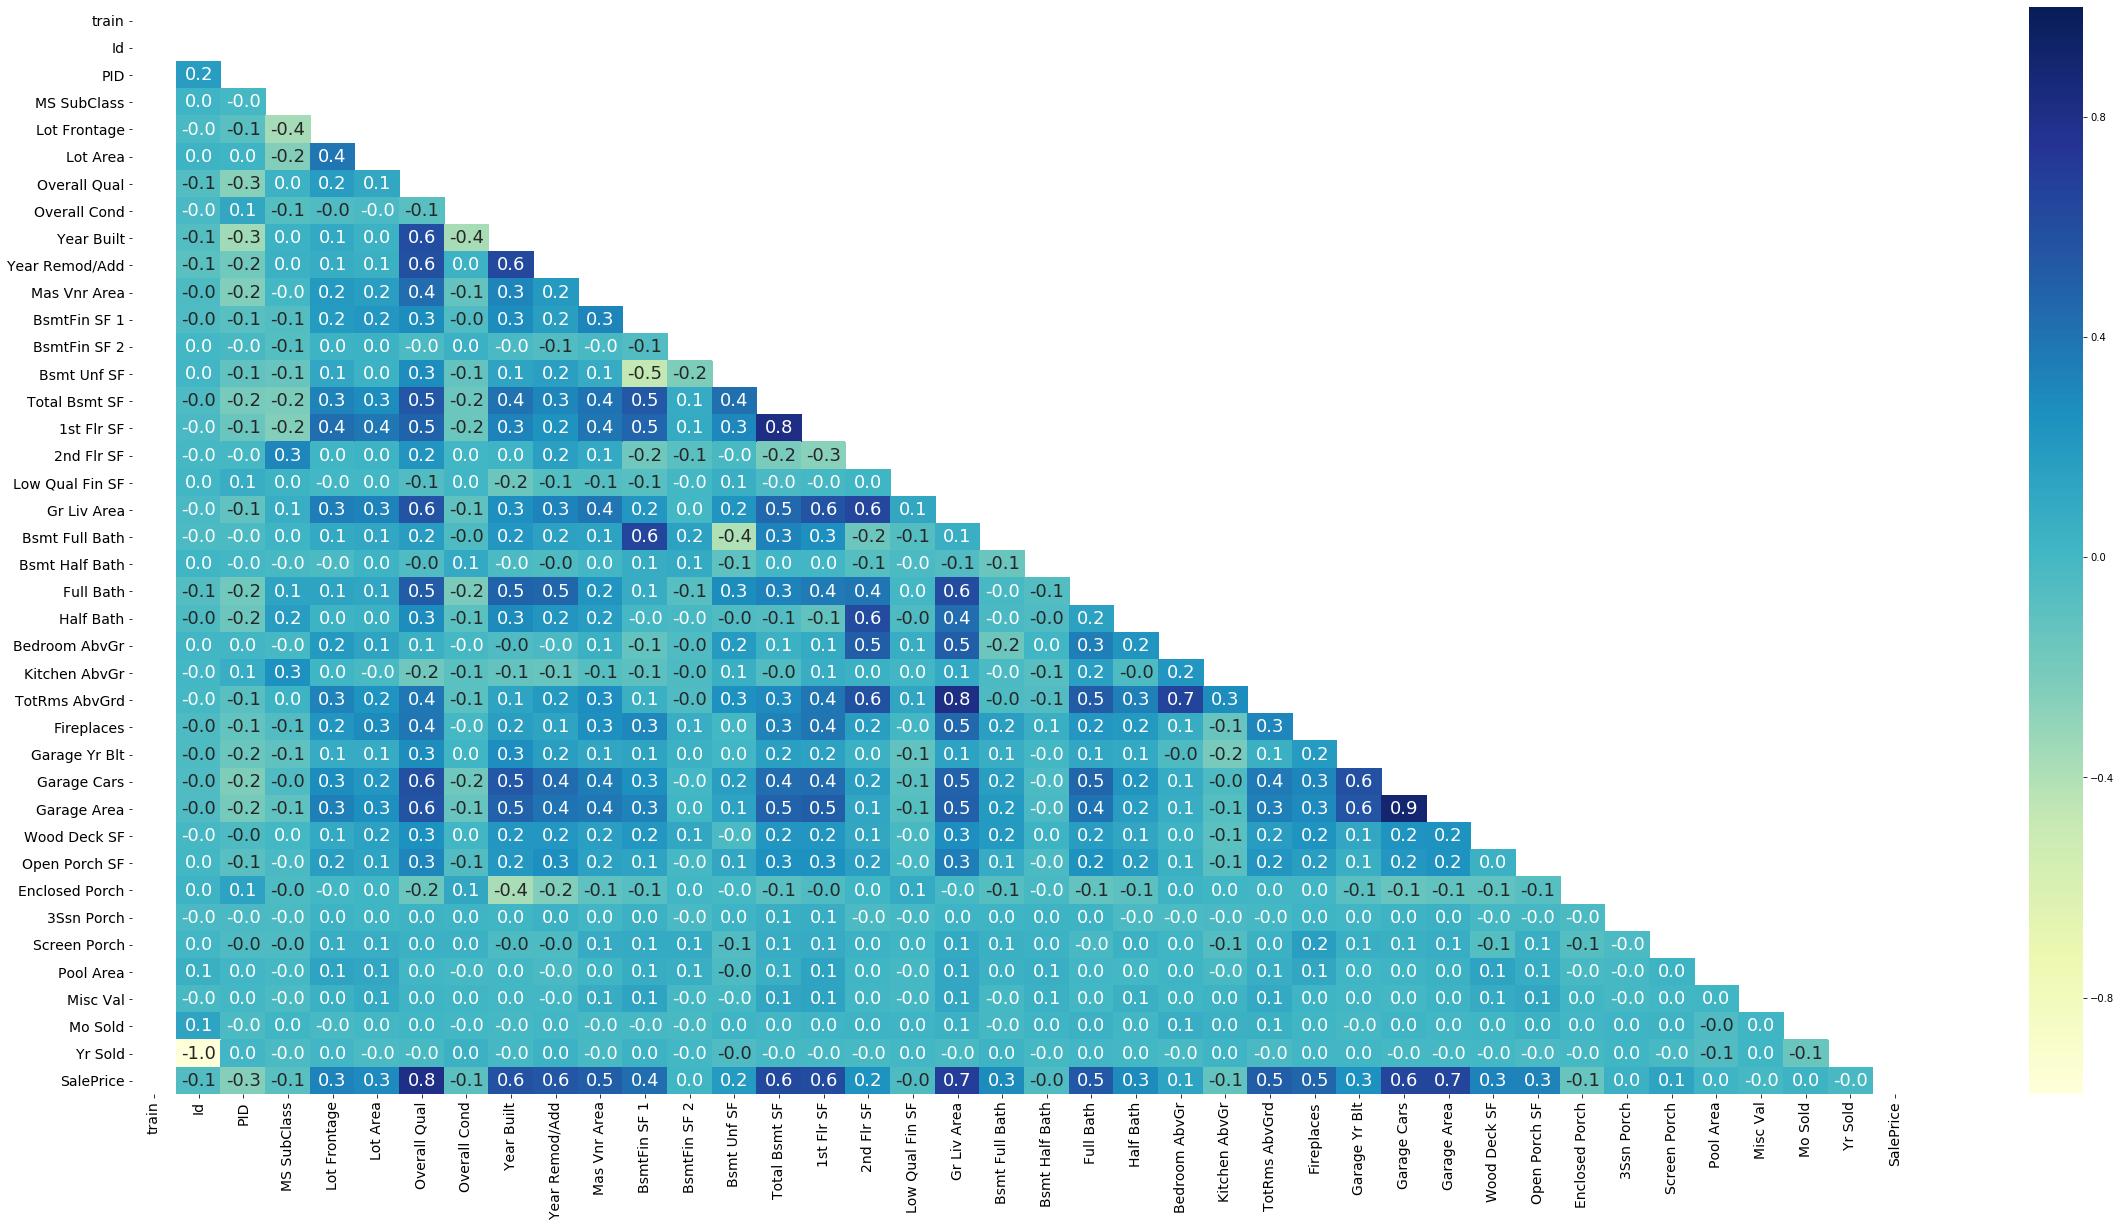

In [113]:
fix, ax = plt.subplots(figsize=(40,20))
mask = np.zeros_like(train_clean_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(train_clean_corr, mask=mask, cmap='YlGnBu',ax=ax,annot=True,fmt='.1f',annot_kws={"size":18})
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14);

In [114]:
null_columns=train_final.columns[train_final.isnull().any()]
train_final[null_columns].isnull().sum()

Series([], dtype: float64)

In [115]:
#train_final.corr()['SalePrice'].sort_values()

In [116]:
train_final_corr=train_final.corr()

# Feature Selection: Filtering method

1. Shortlist a top 20 features that has strong correlation with SalePrice by filtering correlation > 0.4.<br>
2. Amongst the shortlisted features, check for feature's outliers by ploting box plot


In [117]:
#Correlation with output variable
#cor_target = abs(cor["MEDV"])
cor_target = abs(train_final_corr["SalePrice"])

In [118]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4].sort_values(ascending=False)
#print(relevant_features.count())
relevant_features


SalePrice         1.000000
Overall Qual      0.800208
Exter Qual        0.712124
Gr Liv Area       0.697261
Kitchen Qual      0.692587
Garage Area       0.650270
Garage Cars       0.648220
Total Bsmt SF     0.629273
1st Flr SF        0.618451
Bsmt Qual         0.612364
Property Age      0.571930
Year Built        0.571930
Year Remod/Add    0.550589
Remodel Age       0.550589
Fireplace Qu      0.538886
Full Bath         0.538211
found__PConc      0.529002
TotRms AbvGrd     0.503990
Mas Vnr Area      0.503530
Fireplaces        0.471034
Heating QC        0.458620
neigh_NridgHt     0.448623
garage_fin_Unf    0.432468
Bsmt Exposure     0.424804
BsmtFin SF 1      0.423920
garage_fin_Fin    0.422878
mas_type_None     0.411098
Name: SalePrice, dtype: float64

In [180]:
# sns.pairplot(train_final,y_vars=['Overall Qual','Exter Qual','Gr Liv Area','Kitchen Qual','Garage Area','Garage Cars',
#                                 'Total Bsmt SF','1st Flr SF','Bsmt Qual','Property Age','Year Built','Year Remod/Add',
#                                  'Remodel Age','Fireplace Qu','Full Bath','found__PConc','TotRms AbvGrd','Mas Vnr Area',
#                                 'Fireplaces','Heating QC','neigh_NridgHt','garage_fin_Unf','Bsmt Exposure','BsmtFin SF 1',
#                                 'garage_fin_Fin','mas_type_None'],x_vars=['SalePrice'])

Boxplot of target

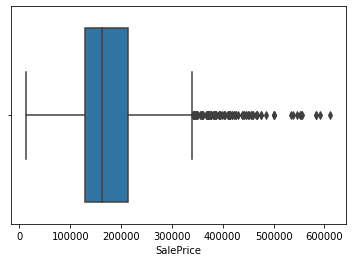

In [120]:
sns.boxplot(train_final['SalePrice']);

 Boxplot of Top 10 Predictors in descending order (exclude quality rating as there shouldn't be any Outliers)

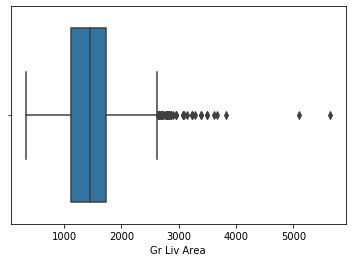

In [178]:
sns.boxplot(train_final['Gr Liv Area']);

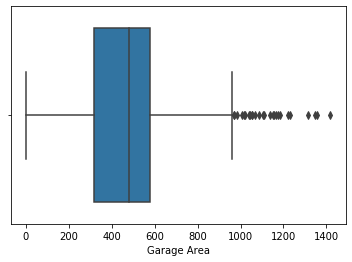

In [179]:
sns.boxplot(train_final['Garage Area']);

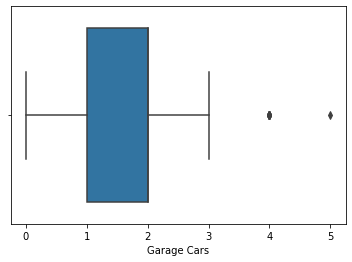

In [181]:
sns.boxplot(train_final['Garage Cars']);

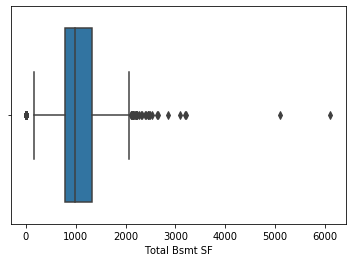

In [182]:
sns.boxplot(train_final['Total Bsmt SF']);

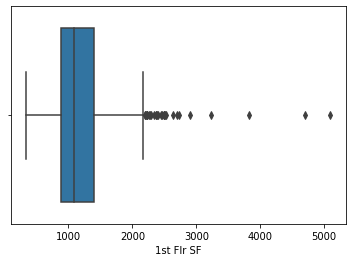

In [183]:
sns.boxplot(train_final['1st Flr SF']);

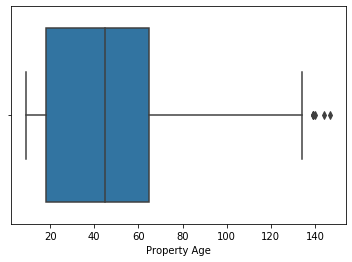

In [184]:
sns.boxplot(train_final['Property Age']);

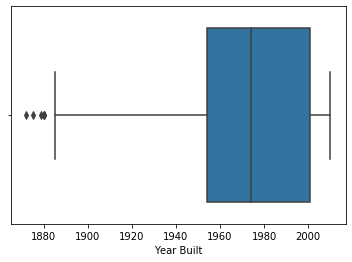

In [185]:
sns.boxplot(train_final['Year Built']);

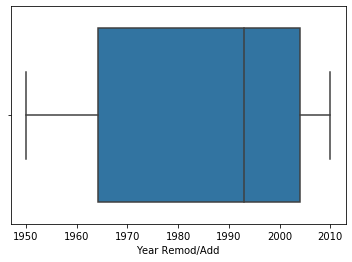

In [186]:
sns.boxplot(train_final['Year Remod/Add']);

# Using All Data, including Outliers.

1.Create our features matrix (X) and target vector (y)

In [122]:
# Create our features matrix (X) and target vector (y)
# features=[col for col in train_final.columns if col !='SalePrice']
# X=train_final[features]
# y=train_final['SalePrice']

In [123]:
X.shape

(2050, 228)

In [124]:
X.head()

,Id,PID,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Enclosed Porch,Exter Cond,Exter Qual,Fireplace Qu,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Cond,Garage Qual,Garage Yr Blt,Gr Liv Area,Half Bath,Heating QC,Kitchen AbvGr,Kitchen Qual,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Overall Cond,Overall Qual,Pool Area,Pool QC,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Property Age,Remodel Age,Remod/Add,Yr Sold,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,zon_C (all),zon_FV,zon_I (all),zon_RH,zon_RL,zon_RM,rd_access_Pave,al_access_Grvl,al_access_Pave,prop_shape_IR2,prop_shape_IR3,prop_shape_Reg,prop_flatness_HLS,prop_flatness_Low,prop_flatness_Lvl,utility_NoSeWa,utility_NoSewr,prop_slope_Mod,prop_slope_Sev,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_Greens,neigh_GrnHill,neigh_IDOTRR,neigh_Landmrk,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,proxi_1_Feedr,proxi_1_Norm,proxi_1_PosA,proxi_1_PosN,proxi_1_RRAe,proxi_1_RRAn,proxi_1_RRNe,proxi_1_RRNn,promxi_2_Feedr,promxi_2_Norm,promxi_2_PosA,promxi_2_PosN,promxi_2_RRAe,promxi_2_RRAn,promxi_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,hse_style_1.5Unf,hse_style_1Story,hse_style_2.5Fin,hse_style_2.5Unf,hse_style_2Story,hse_style_SFoyer,hse_style_SLvl,r_style_Gable,r_style_Gambrel,r_style_Hip,r_style_Mansard,r_style_Shed,r_mat_CompShg,r_mat_Membran,r_mat_Metal,r_mat_Roll,r_mat_Tar&Grv,r_mat_WdShake,r_mat_WdShngl,ex_1_AsphShn,ex_1_BrkComm,ex_1_BrkFace,ex_1_CBlock,ex_1_CemntBd,ex_1_HdBoard,ex_1_ImStucc,ex_1_MetalSd,ex_1_Plywood,ex_1_PreCast,ex_1_Stone,ex_1_Stucco,ex_1_VinylSd,ex_1_Wd Sdng,ex_1_WdShing,ex_2_AsphShn,ex_2_Brk Cmn,ex_2_BrkFace,ex_2_CBlock,ex_2_CmentBd,ex_2_HdBoard,ex_2_ImStucc,ex_2_MetalSd,ex_2_Other,ex_2_Plywood,ex_2_PreCast,ex_2_Stone,ex_2_Stucco,ex_2_VinylSd,ex_2_Wd Sdng,ex_2_Wd Shng,mas_type_BrkFace,mas_type_CBlock,mas_type_None,mas_type_Stone,found__CBlock,found__PConc,found__Slab,found__Stone,found__Wood,heat__GasA,heat__GasW,heat__Grav,heat__OthW,heat__Wall,ele__FuseF,ele__FuseP,ele__Mix,ele__SBrkr,funct_Maj2,funct_Min1,funct_Min2,funct_Mod,funct_Sal,funct_Sev,funct_Typ,garage_ty_2Types,garage_ty_Attchd,garage_ty_Basment,garage_ty_BuiltIn,garage_ty_CarPort,garage_ty_Detchd,garage_fin_Fin,garage_fin_RFn,garage_fin_Unf,paved_dr_P,paved_dr_Y,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,misc_Elev,misc_Gar2,misc_Othr,misc_Shed,misc_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,109,533352170,725,754,0,3,3,1,0.0,0.0,3,192.0,533.0,0.0,6,1,1,0,3,4,0,0,2,475.0,2.0,3,3,1976.0,1479,1,5,1,4,13517,68.0,0,60,289.0,0,3,44,8,6,0,0,0,6,725.0,0,1976,2005,43,14,1,2010,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,544,531379050,913,1209,0,4,3,1,1.0,0.0,4,276.0,637.0,0.0,6,1,1,0,3,4,3,1,2,559.0,2.0,3,3,1997.0,2122,1,5,1,4,11492,43.0,0,60,132.0,0,4,74,5,7,0,0,0,8,913.0,0,1996,1997,23,22,1,2009,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0

In [125]:
y.shape

(2050,)

In [126]:
y.head()

0    130500.0
1    220000.0
2    109000.0
3    174000.0
4    138500.0
Name: SalePrice, dtype: float64

2.Train-Test-Split

In [127]:
# Train Test Split to Split the data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [128]:
X_train.shape

(1537, 228)

In [129]:
X_test.shape

(513, 228)

In [130]:
y_train.shape

(1537,)

In [131]:
y_test.shape

(513,)

# Checking on outliers?

3. Scaling

In [132]:
## Scaling

# 1. initiate object 
ss=StandardScaler()

# 2. fit to get mean & std, 
ss.fit(X_train)

# 3. transform to standardized form, there's a fit.train bit normually used for test data
X_train=ss.transform(X_train)

# 4. need to scale both train & test so that test is scaled based on training data
X_test=ss.transform(X_test)

4. Instantiate models

In [133]:
# Instantiate our models

# Instantiate Linear Regression model
lr=LinearRegression()

# Instantiate Ridge Regression model
ridge=RidgeCV(alphas=np.linspace(.1,10,100))

# Instantiate Lasso Regression model
lasso=LassoCV(n_alphas=100)

5.Cross Validation

In [134]:
# Cross validation to evaluate all three models using.- for LR the default score is acccuracy , rmse

# Get accuracy score for Linear Regression
lr_scores=cross_val_score(lr,X_train,y_train,cv=10)
print('lr_scores :',lr_scores.mean())

# Get accuracy score for Ridge Regression
ridge_scores=cross_val_score(ridge,X_train,y_train,cv=10)
print('ridge_scores :',ridge_scores.mean())

# Get accuracy score for Lsso Regression
lasso_scores=cross_val_score(lasso,X_train,y_train,cv=10)
print('lasso_scores :',lasso_scores.mean())

lr_scores : -3.8090141261081083e+18
ridge_scores : 0.8043537597258583


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureW

lasso_scores : 0.8338279564776505


6.Model Fitting and Evaluation

In [135]:
# based on scores above, Losso has the highest score. 
# 1. Fit Lasso model with training data, and evaluate the training and test scores 

lasso.fit(X_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [136]:
# 2. check on X,Y train lasso score
lasso_R2score_train=lasso.score(X_train,y_train)
print('R2 Score for Lasso Train :',lasso_R2score_train)

R2 Score for Lasso Train : 0.8983255789093125


In [137]:
# 3. check on X,Y test lasso score
lasso_R2score_test=lasso.score(X_test,y_test)
print('R2 Score for Lasso Test :',lasso_R2score_test)

R2 Score for Lasso Test : 0.8991439185061917


In [138]:
# 4. Do prediction based on X-Test
pred_lasso=lasso.predict(X_test)

In [139]:
#.5. Check pred agaist Y_test
r2_score(y_test,pred_lasso)

0.8991439185061918

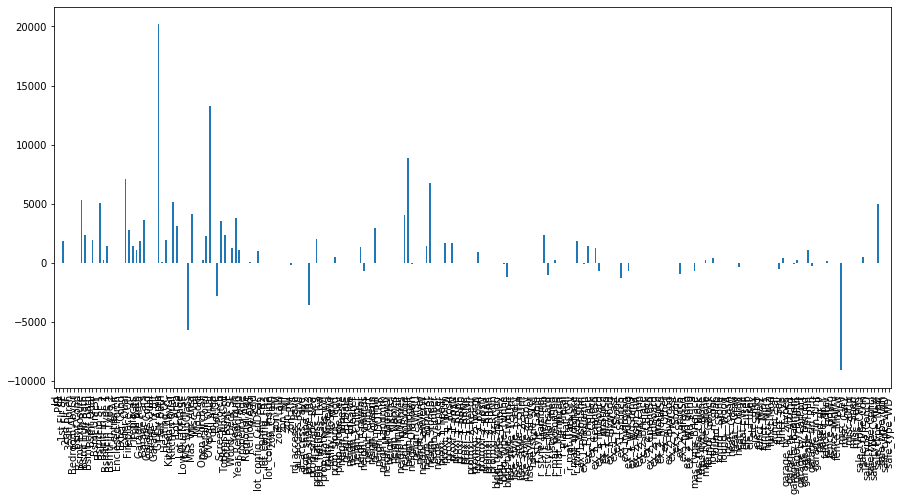

In [140]:
# 6.Uses lasso regression to obtain the subset of features that minimizes prediction error
# by imposing a constraint on the model parameters that causes regression coefficients for some variables to shrink
# toward zero.

pd.Series(lasso.coef_,index=features).plot.bar(figsize=(15,7))

In [141]:
# 7.obtain residuals 
residuals_lasso=y_test-pred_lasso

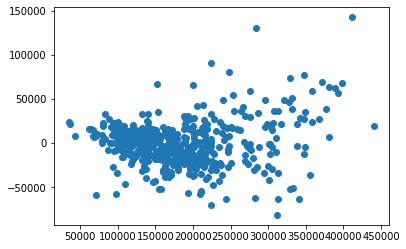

In [142]:
# 8 Plot scatterplot for residual vs prediction.
plt.scatter(pred_lasso,residuals_lasso)

In [143]:
X_train.shape

(1537, 228)

In [144]:
y_train.shape

(1537,)

In [145]:
X_test.shape

(513, 228)

In [146]:
y_test.shape

(513,)

In [168]:
# 9. find optimal alpha for Lasso
lasso.alphas=np.logspace(0, 5, 200)
lasso_optimal = LassoCV(alphas=lasso.alphas, cv=10)
lasso_optimal = lasso_optimal.fit(X_train,y_train)
lasso_optimal_alpha = lasso_optimal.alpha_
print('Optimal Alpha for Lasso :',lasso_optimal_alpha)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 972415780.6312256, tolerance: 839502958.1281738
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1858341427.8399658, tolerance: 839502958.1281738
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2890279493.779114, tolerance: 839502958.1281738
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1304628350.8948975, tolerance: 855012693.7155603
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 987309773.378418, tolerance: 855012693.7155603
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1284794274.2304077, tolerance: 855012693.7155603
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1128503263.652771, tolerance: 831477443.8886532
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1542034908.2675781, tolerance: 831477443.8886532
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1517001035.6224365, tolerance: 831477443.8886532
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1862946636.8666992, tolerance: 831477443.8886532
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1858413592.7250977, tolerance: 831477443.8886532
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 938355317.2921143, tolerance: 884273362.7731602
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want

Optimal Alpha for Lasso : 775.2597488629465


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19132454039.778748, tolerance: 893306758.6030266
  tol, rng, random, positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24680031058.055298, tolerance: 893306758.6030266
  tol, rng, random, positive)


In [170]:
# 10. Print score for lasso with optimal alpha
lasso_opt = Lasso(alpha=lasso_optimal_alpha)
print('Lasso_opt MSE: ',-cross_val_score(lasso_opt, X,y, cv=10, scoring='neg_mean_squared_error').mean())
print('Lasso_opt R2: ', cross_val_score(lasso_opt, X,y, cv=10, scoring='r2').mean())
print('Lasso_opt RMSE :', np.sqrt(-cross_val_score(lasso_opt, X,y, cv=10, scoring='neg_mean_squared_error').mean()))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 578824046019.97, tolerance: 1141910867.1565177
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 612135656634.8707, tolerance: 1174360567.313471
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 615560295640.7966, tolerance: 1172483284.9648936
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6243

Lasso_opt MSE:  1105724759.6507616


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 578824046019.97, tolerance: 1141910867.1565177
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 612135656634.8707, tolerance: 1174360567.313471
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 615560295640.7966, tolerance: 1172483284.9648936
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6243

Lasso_opt R2:  0.8198865431533292


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 578824046019.97, tolerance: 1141910867.1565177
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 612135656634.8707, tolerance: 1174360567.313471
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 615560295640.7966, tolerance: 1172483284.9648936
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6243

Lasso_opt RMSE : 33252.43990522743


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 562837661899.0582, tolerance: 1169460176.983448
  positive)


In [175]:
#relevant_features

In [176]:
# train_final.boxplot(['Overall Qual','Exter Qual','Gr Liv Area','Kitchen Qual','Garage Area','Garage Cars',
#                                 'Total Bsmt SF','1st Flr SF','Bsmt Qual','Property Age','Year Built','Year Remod/Add',
#                                  'Remodel Age','Fireplace Qu','Full Bath','found__PConc','TotRms AbvGrd','Mas Vnr Area',
#                                 'Fireplaces','Heating QC','neigh_NridgHt','garage_fin_Unf','Bsmt Exposure','BsmtFin SF 1',
#                                 'garage_fin_Fin','mas_type_None'])

IndentationError: unexpected indent (<ipython-input-176-25247e1bf090>, line 2)

In [149]:
# l_alphas = np.arange(0.001, 0.15, 0.0025)
# lasso_model = LassoCV(alphas=l_alphas, cv=5)
# lasso_model = lasso_model.fit(Xoverfit, Yoverfit)

In [150]:
# print(-cross_val_score(lasso_model, Xoverfit, Yoverfit, cv=5, scoring='neg_mean_squared_error').mean())
# cross_val_score(lasso_model, Xoverfit, Yoverfit, cv=5, scoring='r2').mean()

In [151]:
# Here is the optimal value of alpha
# lasso_optimal_alpha = lasso_model.alpha_
# lasso_optimal_alpha

In [152]:
# lasso_opt = Lasso(alpha=lasso_optimal_alpha)
# print(-cross_val_score(lasso_opt, Xoverfit, Yoverfit, cv=5, scoring='neg_mean_squared_error').mean())
# cross_val_score(lasso_opt, Xoverfit, Yoverfit, cv=5, scoring='r2').mean()


In [153]:
# guathua
# #find optimal alpha for training data
# ridge_alphas = np.logspace(0, 5, 200)
# optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
# optimal_ridge.fit(X,y)
# print(optimal_ridge.alpha_)
# #make prediction for test data
# test_preds_ridge = optimal_ridge.predict(X_test)

In [154]:
# print score
#    print('Testing R2 score: ', score)
#    print('MSE score: ',mean_squared_error(y_pred, y_test))
#    print('RMSE score: ',np.sqrt(mean_squared_error(y_pred, y_test))

In [155]:
# nc = [x for x in wine.columns if x != target]
# create polymonial features
##X = wine[nc].values
##Y = wine[target].values

##pf = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
##pf = pf.fit(X)
##Xoverfit = pf.transform(X)

# print(X.shape)
# print(Xoverfit.shape)

In [156]:
# predictors = [c for c in data.columns if c not in ['GameId','GameDate','GameTime','HostName',
#                                                    'GuestName','total_score','total_line','game_line',
#                                                    'winner','loser','host_wins','Season']]
# X = data[predictors]
# y = data.host_wins.values

<font color=blue>
Does the student investigate or manufacture features with linear relationships to the target?<br>
Have the data been scaled appropriately?<br>
Does the student properly split and/or sample the data for validation/training purposes?<br>
Does the student utilize feature selection to remove noisy or multi-collinear features?<br>
Does the student test and evaluate a variety of models to identify a production algorithm (AT MINIMUM: linear regression, lasso, and ridge)?<br>
Does the student defend their choice of production model relevant to the data at hand and the problem?<br>
Does the student explain how the model works and evaluate its performance successes/downfalls?<br>

1) pairplot to see overall correlation<br>

2) create I'm plot<br>
3) training n testing data. set x, y<br>
4)test train split/ k-fold /5 or 10<br>
5)train the model for linear/ridge/lasso/EN<br>
- fit & coefficient<br>
6)test- I'm.predict<br>
7)scatterplot ,actual value vs predicted value<br>
8)Evaluating model <br>
- MAE<br>
-MSE<br>
-RMSE<br>
-R2<br>
-Adjusted R2<br>
-p-value<br>
9)Residual<br>
- plot histogram of residual to see if its normally distributed<br>
10)conclusion<br>

pairplot for columns with null value to see if there is any correlationship between the predictor and target.

In [157]:
# sns.pairplot(full_train, y_vars=['Lot Frontage', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure','BsmtFin Type 1','BsmtFin SF 1','BsmtFin Type 2','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath','Fireplace Qu','Garage Yr Blt','Garage Cars','Garage Area','Garage Qual','Garage Cond','Pool QC'], x_vars=['SalePrice'])

Decide to drop 2 columns 'Fireplace Qu' and 'Pool QC'

One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other. If these variables are correlated with each other, then we need to keep only one of them and drop the rest.

In [158]:
# relevant_X=full_train[['SalePrice','Overall Qual','Exter Qual','Gr Liv Area','Kitchen Qual','Bsmt Qual','Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','Year Built','Year Remod/Add','Full Bath','Garage Yr Blt','found__PConc','Mas Vnr Area','TotRms AbvGrd','Fireplaces','Heating QC','neigh_NridgHt','Bsmt Exposure','garage_fin_Unf','mas_type_None','BsmtFin SF 1','garage_fin_Fin','Pool QC']]

In [159]:
# relevant_X.shape

In [160]:
# relevant_X_corr=relevant_X.corr()

In [161]:

# fix, ax = plt.subplots(figsize=(30,30))
# mask = np.zeros_like(relevant_X_corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# ax = sns.heatmap(relevant_X_corr, mask=mask, cmap='YlGnBu',ax=ax,annot=True,fmt='.1f',annot_kws={"size":25})
# ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
# ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14);

In [162]:
#print(full_train[['Overall Qual','Exter Qual','Gr Liv Area','Kitchen Qual','Bsmt Qual','Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','Year Built','Year Remod/Add','Full Bath','Garage Yr Blt','found__PConc','Mas Vnr Area','TotRms AbvGrd','Fireplaces','Heating QC','neigh_NridgHt','Bsmt Exposure','garage_fin_Unf','mas_type_None','BsmtFin SF 1','garage_fin_Fin','Pool QC']].corr())

In [163]:
#print(df[["LSTAT","PTRATIO"]].corr())
#print(df[["RM","LSTAT"]].corr())

# print(full_train[['Garage Area','Garage Cars','Garage Yr Blt','garage_fin_Unf','garage_fin_Fin']].corr())

In [164]:
# sns.pairplot(full_train, x_vars=['Garage Area','Garage Cars','Garage Yr Blt','garage_fin_Unf','garage_fin_Fin'], y_vars=['SalePrice'])

Garage Area & Garage Cars highly corelated with each other. Hence we would keep only one variable and drop the other. We will keep Garage Area since its correlation with SalePrice is higher than that of Garage Cars.

<font color=blue> drop <br>
1. Garage Cars<br>
2. 
3. 

In [165]:
# print(full_train[['Bsmt Qual','Total Bsmt SF','Bsmt Exposure','BsmtFin SF 1']].corr())

Correlationship of 'Bsmt Qual','Total Bsmt SF','Bsmt Exposure','BsmtFin SF 1' are not high, thus can be remained.

In [166]:
# sns.pairplot(full_train, x_vars=['Bsmt Qual','Total Bsmt SF','Bsmt Exposure','BsmtFin SF 1'], y_vars=['SalePrice'])

Total Bsmt SF & 1st Flr SF highly corelated with each other. Hence we would keep only one variable and drop the other. We will keep Total Bsmt SF since its correlation with SalePrice is higher than that of 1st Flr SF.

In [167]:
#print(full_train[['Year Built','Year Remod/Add']].corr())

# Modeling

Establish your baseline score.
Fit linear regression. Look at your coefficients. Are any of them wildly overblown?
Fit lasso/ridge/elastic net with default parameters.
Go back and remove features that might be causing issues in your models.
Tune hyperparameters.
Identify a production model. (This does not have to be your best performing Kaggle model, but rather the model that best answers your problem statement.)
Refine and interpret your production model.

# Wrapper Method

# Backward Elimination

we feed all the possible features to the model at first. We check the performance of the model and then iteratively remove the worst performing features one by one till the overall performance of the model comes in acceptable range.

we feed all the possible features to the model at first. We check the performance of the model and then iteratively remove the worst performing features one by one till the overall performance of the model comes in acceptable range.

# Inferential Visualizations

Look at feature loadings.
Look at how accurate your predictions are.
Is there a pattern to your errors? Consider reworking your model to address this.

# Business Recommendations

Which features appear to add the most value to a home?
Which features hurt the value of a home the most?
What are things that homeowners could improve in their homes to increase the value?
What neighborhoods seem like they might be a good investment?
Do you feel that this model will generalize to other cities? How could you revise your model to make it more universal OR what date would you need from another city to make a comparable model?

# Evaluation and Conceptual Understanding

<font color=blue>
Does the student accurately identify and explain the baseline score?<br>
Does the student select and use metrics relevant to the problem objective?<br>
Is more than one metric utilized in order to better assess performance?<br>
Does the student interpret the results of their model for purposes of inference?<br>
Is domain knowledge demonstrated when interpreting results?<br>
Does the student provide appropriate interpretation with regards to descriptive and inferential statistics?<br>

# Conclusion and Recommendations

<font color=blue>
Does the student provide appropriate context to connect individual steps back to the overall project?<br>
Is it clear how the final recommendations were reached?<br>
Are the conclusions/recommendations clearly stated?<br>
Does the conclusion answer the original problem statement?<br>
Does the student address how findings of this research can be applied for the benefit of stakeholders?<br>
Are future steps to move the project forward identified?<br>